<a href="https://colab.research.google.com/github/DariiaKhoroshchuk/health_insurance_cross_sell_prediction/blob/master/BD%26ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition

[Dataset Link](https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction?datasetId=869050&sortBy=voteCount&select=test.csv)

# Imports

In [ ]:
import numpy as np
import pandas as pd

import scipy
import sklearn
import plotly
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import metrics

from sklearn.utils import class_weight
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler, Normalizer, scale
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, log_loss, balanced_accuracy_score

%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/AIS/BD_ML_datasets/Health_Insurance_Cross_Sell_Prediction"

# Data Cleaning and Formatting

## Concatenation

In [ ]:
%cd /content/drive/MyDrive/AIS/BD_ML_datasets/Health_Insurance_Cross_Sell_Prediction

/content/drive/MyDrive/AIS/BD_ML_datasets/Health_Insurance_Cross_Sell_Prediction


In [ ]:
%ls

insurance.pkl  sample_submission.csv  test.csv  train.csv


In [ ]:
data_path = "/content/drive/MyDrive/AIS/BD_ML_datasets/Health_Insurance_Cross_Sell_Prediction"

In [ ]:
train = pd.read_csv(data_path + "/train.csv")
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
test = pd.read_csv(data_path + "/test.csv")
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [ ]:
test_num = round((test.shape[0]*100)/(test.shape[0]+train.shape[0]), 2)
train_num = 100 - test_num
print(f"Dataset splitted into a testing set of {test_num}% of the people, and a training set of {train_num}% of the people.")

Dataset splitted into a testing set of 25.0% of the people, and a training set of 75.0% of the people.


In [ ]:
submission = pd.read_csv(data_path + "/sample_submission.csv")
submission

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


In [ ]:
test = test.merge(submission, how='inner', on='id')
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,0
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,0
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199,0
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187,0
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,0
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,0
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,0
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127037 entries, 0 to 127036
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
 11  Response              127037 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 12.6+ MB


In [ ]:
frames = [train, test]
data = pd.concat(frames, ignore_index=True)
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
508141,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,0
508142,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,0
508143,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,0
508144,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,0


In [ ]:
data.to_pickle(data_path + '/insurance.pkl')

## Load and Examine data

In [ ]:
%cd /content/drive/MyDrive/AIS/BD_ML_datasets/Health_Insurance_Cross_Sell_Prediction

/content/drive/MyDrive/AIS/BD_ML_datasets/Health_Insurance_Cross_Sell_Prediction


In [ ]:
data = pd.read_pickle(data_path + "/insurance.pkl")

In [ ]:
data = pd.read_pickle(data_path + "/insurance_int.pkl")

In [ ]:
data = pd.read_pickle(data_path + "/insurance_int_cat.pkl")

In [ ]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
508141,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,0
508142,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,0
508143,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,0
508144,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,0


In [ ]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000
mean,254073.500000,38.808413,0.997936,26.406572,0.458667,30554.453041,111.975838,154.340123,0.091922
std,146689.259281,15.500179,0.045388,13.224921,0.498289,17146.574625,54.246027,83.668793,0.288917
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,127037.250000,25.000000,1.000000,15.000000,0.000000,24381.000000,26.000000,82.000000,0.000000
50%,254073.500000,36.000000,1.000000,28.000000,0.000000,31661.000000,133.000000,154.000000,0.000000
75%,381109.750000,49.000000,1.000000,35.000000,1.000000,39403.750000,152.000000,227.000000,0.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Data Types and Missing Values

In [ ]:
print(f'Number of rows: {data.shape[0]}\nNumber of features: {data.shape[1]}')
print("-" * 50, "\n")
data.info()

Number of rows: 508146
Number of features: 12
-------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              508146 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 46.5+ MB

In [ ]:
text="Number of missing values for each feature:"
print(text)
print("-" * len(text))
data.isna().sum()

Number of missing values for each feature:
------------------------------------------


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

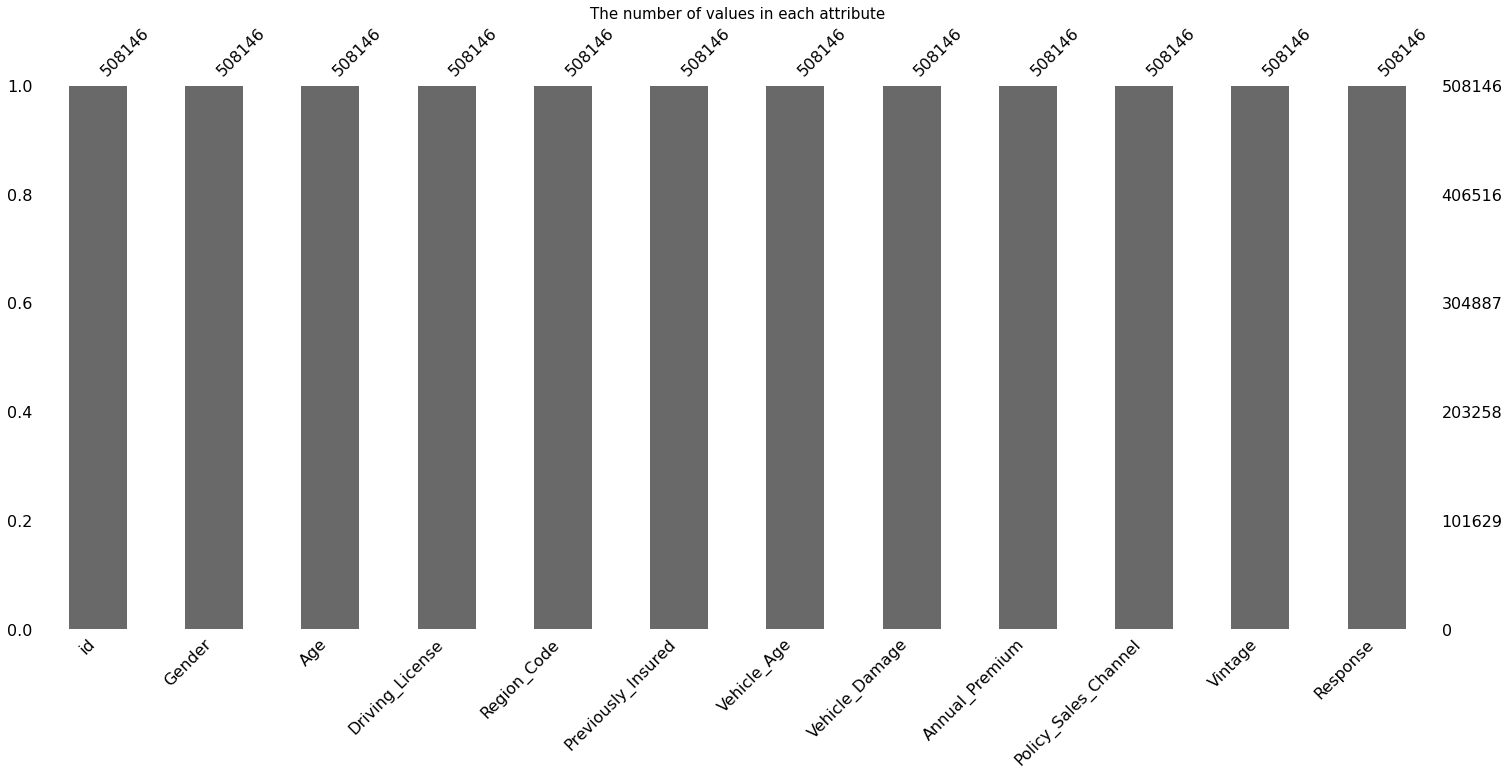

In [ ]:
# Visualization missing values
msno.bar(data)
plt.title('The number of values ​​in each attribute', fontsize=15)
plt.show()

**Result:** There are no missing data.

In [ ]:
print(f'The number of duplicate in a data: {data.duplicated().sum()}')

The number of duplicate in a data: 0


**Result:** There are no dublicate rows in data.

**Categorical and Numeric variables**

In [ ]:
C = (data.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (data.dtypes == 'int64') 
Float   = (data.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

In [ ]:
print(f'Categorical variables:\n {CategoricalVariables}\n')
print(f'Numeric variables:\n {NumericVariables}')

Categorical variables:
 ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

Numeric variables:
 ['id', 'Age', 'Driving_License', 'Previously_Insured', 'Vintage', 'Response', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel']


Probably some of numeric variables also can be categorical. Code below checks that hypothesis.

In [ ]:
text = 'Number of unique elements in each column'
print(text)
print('-' * len(text), "\n")

print("Categorical variables:\n"+'-' * len("Categorical variables:"))
for i in CategoricalVariables:
  uniq = data[i].nunique()
  print(f'{i}: {uniq}')
print()

print("Numeric variables:\n"+'-' * len("Numeric variables:"))
for i in NumericVariables:
  uniq = data[i].nunique()
  print(f'{i}: {uniq}')

Number of unique elements in each column
---------------------------------------- 

Categorical variables:
----------------------
Gender: 2
Vehicle_Age: 3
Vehicle_Damage: 2

Numeric variables:
------------------
id: 508146
Age: 66
Driving_License: 2
Previously_Insured: 2
Vintage: 290
Response: 2
Region_Code: 53
Annual_Premium: 52062
Policy_Sales_Channel: 157


**Result:** There are numerical variables that have only 2-3 values and probably are categorical variables.

In [ ]:
for col in data.columns:
  if data[col].nunique() < 5 and data[col].dtypes != "object":
    CategoricalVariables.append(col)
    NumericVariables.remove(col)

print(f'Categorical variables:\n {CategoricalVariables}\n')
print(f'Numeric variables:\n {NumericVariables}')

Categorical variables:
 ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Driving_License', 'Previously_Insured', 'Response']

Numeric variables:
 ['id', 'Age', 'Vintage', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel']


In [ ]:
text = 'Unique values in each categorical column'
print(text)
print('-' * len(text))
for i in CategoricalVariables:
  uniq = data[i].unique()
  print(f'{i}: {uniq}')

Unique values in each categorical column
----------------------------------------
Gender: ['Male' 'Female']
Vehicle_Age: ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage: ['Yes' 'No']
Driving_License: [1 0]
Previously_Insured: [0 1]
Response: [1 0]


According to the data description, "Policy_Sales_Channel" is anonymized code for the channel of outreaching to the customer (ie. Different Agents, Over Mail, Over Phone, In Person, etc). So there seems to be categorical data.


"Region_Code" also seems to be categorical data, because it is code of region, not just numeric variable.

In [ ]:
text = 'Unique values in "Policy_Sales_Channel" and "Region_Code" columns'
print(text)
print('-' * len(text))
for i in ["Policy_Sales_Channel", "Region_Code"]:
  uniq = data[i].unique()
  print(f'{i}: \n{uniq}\n')

Unique values in "Policy_Sales_Channel" and "Region_Code" columns
-----------------------------------------------------------------
Policy_Sales_Channel: 
[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54.  93. 116.  91.  45.   9. 145. 147.  44. 109.  37. 140. 107.
 128. 131. 114. 118. 159. 119. 105. 135.  62. 138. 129.  88.  92. 111.
 113.  73.  36.  28.  35.  59.  53. 148. 133. 108.  64.  39.  94. 132.
  46.  81. 103.  90.  51.  27. 146.  63.  96.  40.  66. 100.  95. 123.
  98.  75.  69. 130. 134.  49.  97.  38.  17. 110.  80.  71. 117.  58.
  20.  76. 104.  87.  84. 137. 126.  68.  67. 101. 115.  57.  82.  79.
 112.  99.  70.   2.  34.  33.  74. 102. 149.  43.   6.  50. 144. 143.
  41. 141. 142.]

Region_Code: 
[28.  3. 11. 41. 33.  6. 35. 50.

Policy_Sales_Channel and Region_Code variables are float64, but there are not any digits after dot.

Data type will be converted to int64.

In [ ]:
for col in ["Policy_Sales_Channel", "Region_Code"]:
  data[col] = data[col].astype(int)
data.to_pickle("/content/drive/MyDrive/AIS/BD_ML_datasets/Health_Insurance_Cross_Sell_Prediction/insurance_int.pkl")

In [ ]:
data[['Policy_Sales_Channel', 'Region_Code']].head(3)

,Policy_Sales_Channel,Region_Code
0,26,28
1,26,3
2,26,28


In [ ]:
CategoricalVariables.extend(["Policy_Sales_Channel", "Region_Code"])
for i in ["Policy_Sales_Channel", "Region_Code"]:
  NumericVariables.remove(i)
print(f'Categorical variables:\n {CategoricalVariables}\n')
print(f'Numeric variables:\n {NumericVariables}')

Categorical variables:
 ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Driving_License', 'Previously_Insured', 'Response', 'Policy_Sales_Channel', 'Region_Code']

Numeric variables:
 ['id', 'Age', 'Vintage', 'Annual_Premium']


In [ ]:
NumericVariables = ['id', 'Age', 'Vintage', 'Annual_Premium']
CategoricalVariables = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Driving_License', 'Previously_Insured', 'Response', 'Policy_Sales_Channel', 'Region_Code']

There are "id" column in Numeric variables, but there is no need to analyze it, so that feature will be dropped.

In [ ]:
num_data = data[NumericVariables].copy()
num_data = num_data.drop(columns = "id")

For further analysis and graphing, categorical variables are represented as "category".

In [ ]:
for i in CategoricalVariables:
  data[i] = pd.Categorical(data[i], categories=data[i].unique())
  print(i, data[i].unique())
data.info()

Gender ['Male', 'Female']
Categories (2, object): ['Male', 'Female']
Vehicle_Age ['> 2 Years', '1-2 Year', '< 1 Year']
Categories (3, object): ['> 2 Years', '1-2 Year', '< 1 Year']
Vehicle_Damage ['Yes', 'No']
Categories (2, object): ['Yes', 'No']
Driving_License [1, 0]
Categories (2, int64): [1, 0]
Previously_Insured [0, 1]
Categories (2, int64): [0, 1]
Response [1, 0]
Categories (2, int64): [1, 0]
Policy_Sales_Channel [26, 152, 160, 124, 14, ..., 144, 143, 41, 141, 142]
Length: 157
Categories (157, int64): [26, 152, 160, 124, ..., 143, 41, 141, 142]
Region_Code [28, 3, 11, 41, 33, ..., 4, 51, 42, 1, 52]
Length: 53
Categories (53, int64): [28, 3, 11, 41, ..., 51, 42, 1, 52]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    508146 non-null  int64   
 1   Gender                508146 non-null  ca

**Summary:**

In [ ]:
num_data.describe()

,Age,Vintage,Annual_Premium
count,508146.000000,508146.000000,508146.000000
mean,38.808413,154.340123,30554.453041
std,15.500179,83.668793,17146.574625
min,20.000000,10.000000,2630.000000
25%,25.000000,82.000000,24381.000000
50%,36.000000,154.000000,31661.000000
75%,49.000000,227.000000,39403.750000
max,85.000000,299.000000,540165.000000


In [ ]:
data.describe(include=['category'])

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
count,508146,508146,508146,508146,508146,508146,508146,508146
unique,2,2,53,2,3,2,157,2
top,Male,1,28,0,1-2 Year,Yes,152,0
freq,274325,507097,141937,275076,267015,256248,179523,461436


In [ ]:
data[CategoricalVariables].describe(include=['object'])

,Gender,Vehicle_Age,Vehicle_Damage
count,508146,508146,508146
unique,2,3,2
top,Male,1-2 Year,Yes
freq,274325,267015,256248


In [ ]:
data.to_pickle("/content/drive/MyDrive/AIS/BD_ML_datasets/Health_Insurance_Cross_Sell_Prediction/insurence_int_cat.pkl")

# Exploratory Data Analysis

Features of Vehicle insurence dataset contains the following data:


1.   Personal (Gender, Age, Driving License, Region Code, Driving_License)
2.   Vehicles (Vehicle Age, Vehicle Damage, Previously_Insured)
3.   Policy (Annual_Premium, Policy_Sales_Channel, Vintage)

Target variable - Responce



## Functions

In [ ]:
def summary(col, response=False):
  # calculating Q1, Q3 and IQR values and identifying outliers
  if response:
    col_min = data[data["Response"]==1][col].min()
    col_max = data[data["Response"]==1][col].max()
    Q1 = data[data["Response"]==1][col].quantile(0.25)
    Q2 = data[data["Response"]==1][col].quantile(0.50)
    Q3 = data[data["Response"]==1][col].quantile(0.75)
    IQR = Q3 - Q1
    point_out = [x for x in data[data["Response"]==1][col] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
  else:
    col_min = data[col].min()
    col_max = data[col].max()
    Q1 = data[col].quantile(0.25)
    Q2 = data[col].quantile(0.50)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    point_out = [x for x in data[col] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
    point_out_per = (len(point_out) * 100) / data.shape[0]

  print(f'5 Point Summary of {col.capitalize()} Attribute:\n'
        f'{col.capitalize()}(min) : {col_min}\n'
        f'Q1                    : {Q1}\n'
        f'Q2(Median)            : {Q2}\n'
        f'Q3                    : {Q3}\n'
        f'{col.capitalize()}(max) : {col_max}')
  print(f'Identified outliers for charges: {len(point_out)}/{data.shape[0]}, that is {round(point_out_per, 2)}%')

In [ ]:
def cat_summary(df, col, plot=True):
  num = df[col].nunique()
  if plot:
    plt.figure(figsize=(13, 7))
    plt.suptitle(col, fontsize=15)
    count = df[col].value_counts()

    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=df, order = count.index)
    plt.title(f"Frequency of {col}")
    
    plt.subplot(1, 2, 2)
    if num == 2:
      count.plot.pie(autopct = '%1.1f%%', explode = [0, 0.1], title = f"Percentage of {col}")
    elif num == 3:
      count.plot.pie(autopct = '%1.1f%%', explode = [0, 0.1, 0.1], title = f"Percentage of {col}")

In [ ]:
def num_summary(df, col, plot=True):
  if plot:
    plt.figure(figsize=(15, 15))
    # plt.suptitle(col, fontsize=15)
    plt.subplot(3, 1, 1)
    sns.countplot(df[col], color='#3C87CD')
    plt.title(f"Frequency of {col}")
    
    plt.subplot(3, 1, 2)
    sns.distplot(df[col])
    plt.title(f"Distribution of {col}")

    plt.subplot(3, 1, 3)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")

In [ ]:
def num_summary_by_response(df, col, plot=True):
  
  plt.figure(figsize=(15, 10))

  plt.subplot(2, 1, 1)
  sns.kdeplot(data.loc[data['Response']==0, col], label='0', legend=True)
  sns.kdeplot(data.loc[data['Response']==1, col], label='1', legend=True)
  plt.title(f"Distribution of {col}/Response")
  if plot:
    plt.subplot(2, 1, 2)
    sns.boxplot(df['Response'], df[col])
    plt.title(f"Boxplot of {col}/Response")

In [ ]:
def num_summary_dist_box(df, col, plot=True):
  if plot:
    plt.figure(figsize=(15, 15))

    plt.subplot(2, 1, 1)
    sns.distplot(df[col])
    plt.title(f"Distribution of {col}")

    plt.subplot(2, 1, 2)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")

In [ ]:
def num_summary_hist(df, col, plot=True):
  if plot:
    plt.figure(figsize=(10,5))
    # sns.distplot(df[col])
    plt.title(f"{col}", fontsize=15)
    df[col].hist(bins=50)

## Single Variable Plots/Detecting Outliers

### Response

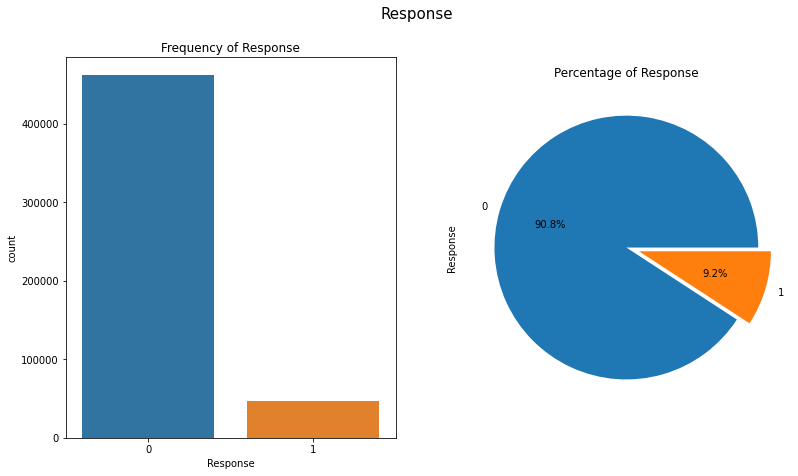

In [ ]:
cat_summary(data, "Response")

In [ ]:
data["Response"].value_counts()

0    461436
1     46710
Name: Response, dtype: int64

**Results:** 
*   According to the plots, the amount of people taking the insurance is very low compared to people who don't. More interesting is Response=1.
*   There is imbalanced binary classification problem.


### Gender

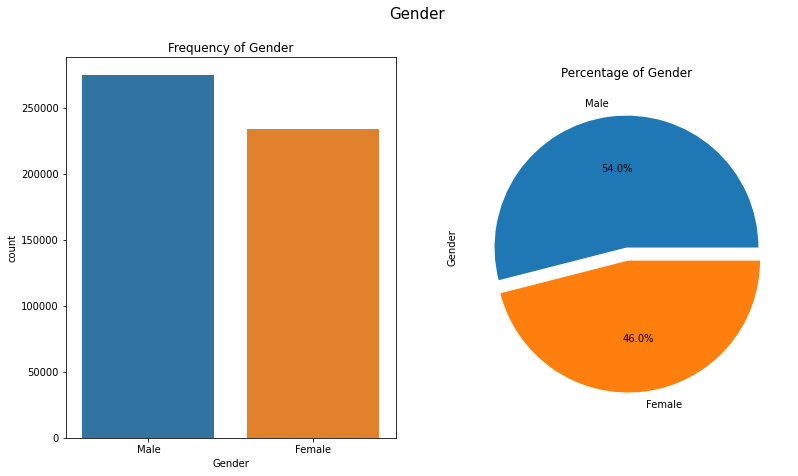

In [ ]:
cat_summary(data, "Gender")

**Results:**

*   The gender variable in the dataset is almost equally distributed.

### Age

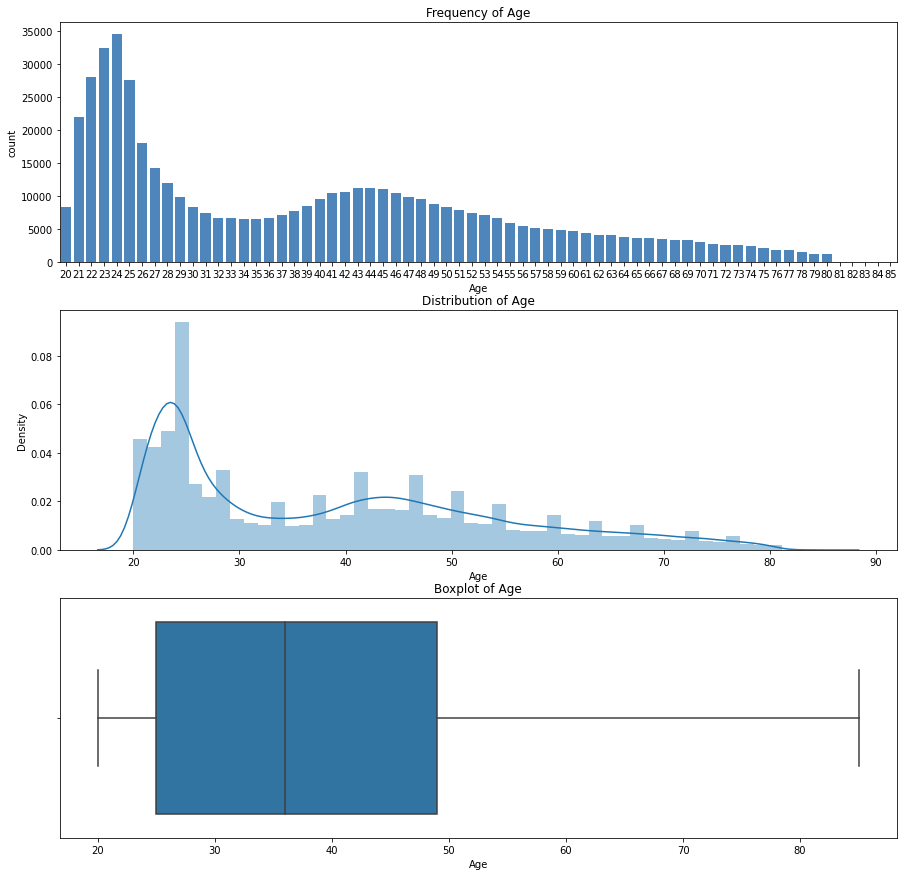

In [ ]:
num_summary(data, "Age")

**Results:**

*   Customers aged 24 are the largest number in the dataset.
*   Average age is 38 across the whole dataset.
*   Based on Boxplot there are no outliers.


### Driving Licence

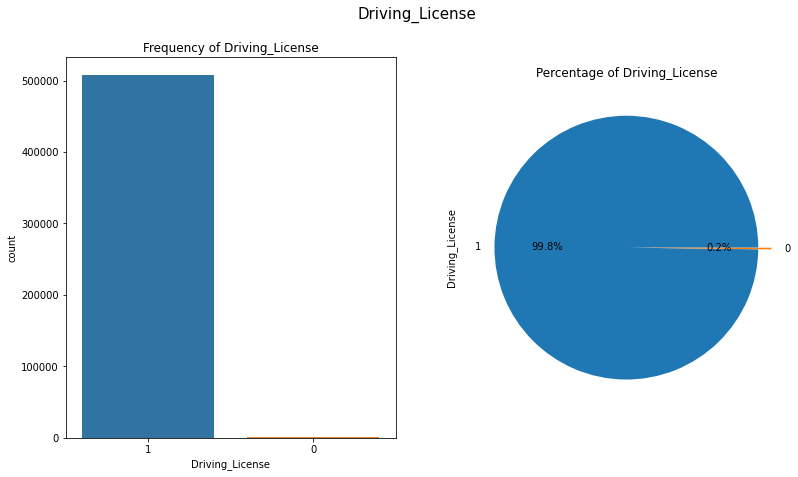

In [ ]:
cat_summary(data, "Driving_License")

**Results:**


*   More than 99% of customers have Driving License.

### Region Code

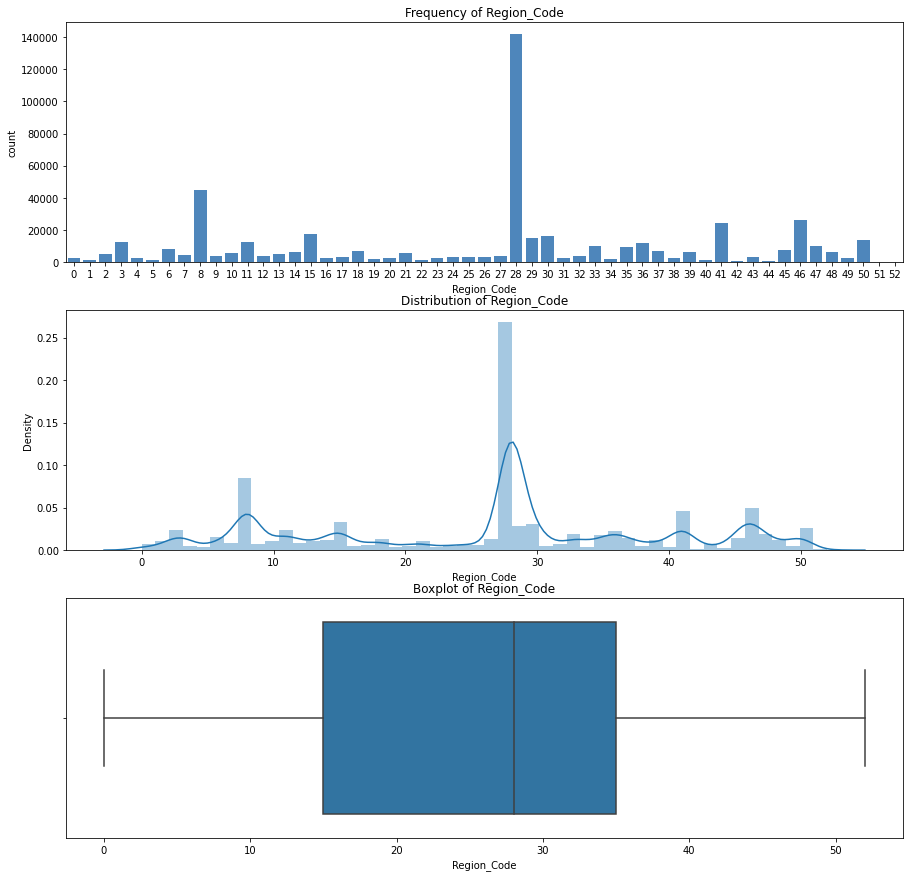

In [ ]:
num_summary(data, "Region_Code")

**Results:**

*   Region Code 28 prevails.
*   Based on Boxplot there are no outliers.


### Previously Insured

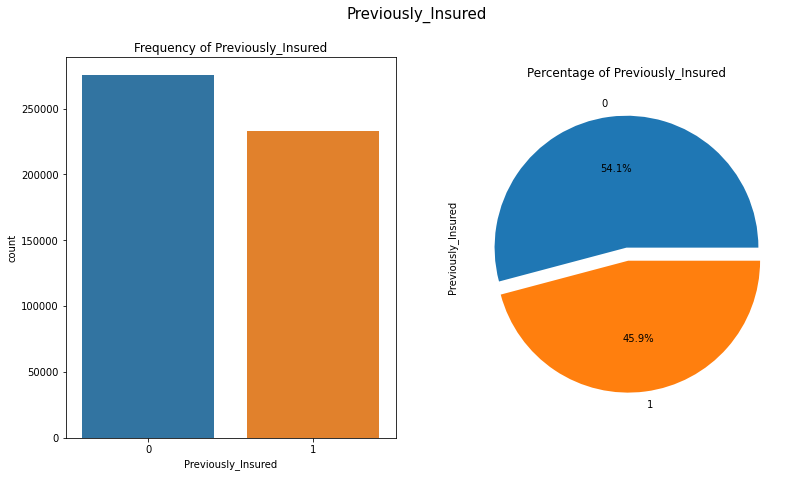

In [ ]:
cat_summary(data, "Previously_Insured")

**Results:**

*   Previuosly_Insured class is pretty balanced.

### Vehicle Age

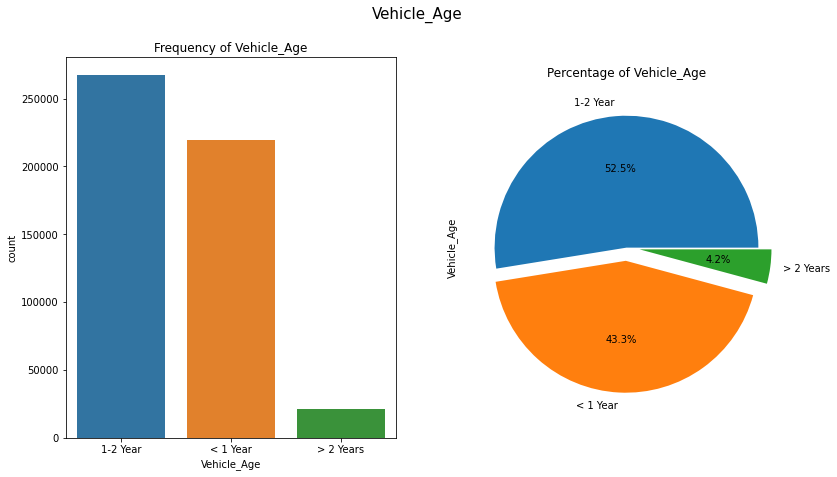

In [ ]:
cat_summary(data, "Vehicle_Age")

**Results:**

*   Mostly Vehicle_Age is 1-2 Year.


### Vehicle Damage

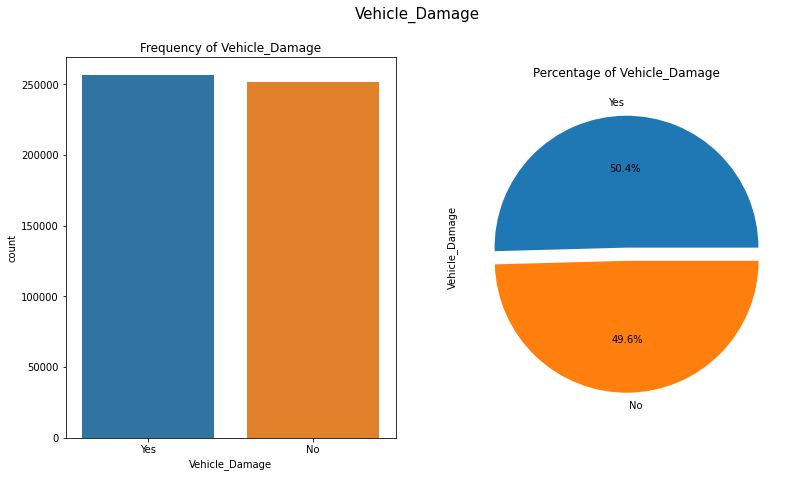

In [ ]:
cat_summary(data, "Vehicle_Damage")

**Results:**

*   Values of Vechicle_Damage ​​are uniformly distributed.

### Annual Premium

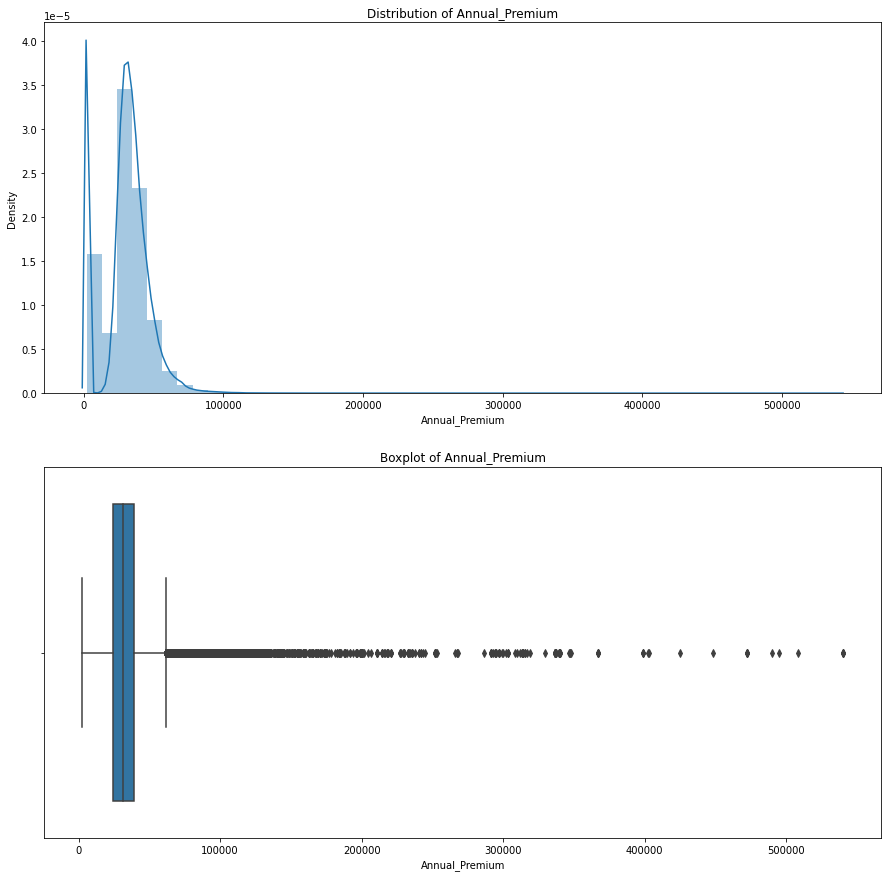

In [ ]:
num_summary_dist_box(data, "Annual_Premium")

In [ ]:
summary("Annual_Premium")

5 Point Summary of Annual_premium Attribute:
Annual_premium(min) : 2630.0
Q1                    : 24381.0
Q2(Median)            : 31661.0
Q3                    : 39403.75
Annual_premium(max) : 540165.0
Identified outliers for charges: 13673/508146, that is 2.69%


**Results:** 
*  Based on the boxplot there are outliers in "Annual_Premium", that representing 2.69% of the entire dataset.



Accoring to the article "[A Review and Comparison of Methods for Detecting Outliers in Univariate Data Sets](http://d-scholarship.pitt.edu/7948/1/Seo.pdf)", Tukey's methon is quite effective, especially when working with large continuous datasets.

The observations between an inner fence and its nearby outer fence
as “outside”, potential (possible) outliers, and anything beyond outer fences as “far out”, problematic (probable)  outliers.

In [ ]:
data = pd.read_pickle(data_path + "/insurance_int.pkl")

In [ ]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    # set an upper or lower limit to the premium paid by the customer
    df1 = df.copy()
    df1.loc[df1['Annual_Premium']>=outer_fence_ue,'Annual_Premium'] = outer_fence_ue
    # df1.loc[df1['Annual_Premium']<=outer_fence_le,'Annual_Premium'] = outer_fence_le
    return outliers_prob, outliers_poss, df1

In [ ]:
probable_outliers_tm, possible_outliers_tm, data_wo_o = tukeys_method(data, "Annual_Premium")
print(f'Probable Annual_Premium outliers:\n {len(probable_outliers_tm)}, that is {round((len(probable_outliers_tm) * 100) / data.shape[0], 2)}%')
print(f'Possible Annual_Premium outliers:\n {len(possible_outliers_tm)}, that is {round((len(possible_outliers_tm) * 100) / data.shape[0], 2)}%')

Probable Annual_Premium outliers:
 2423, that is 0.48%
Possible Annual_Premium outliers:
 13673, that is 2.69%


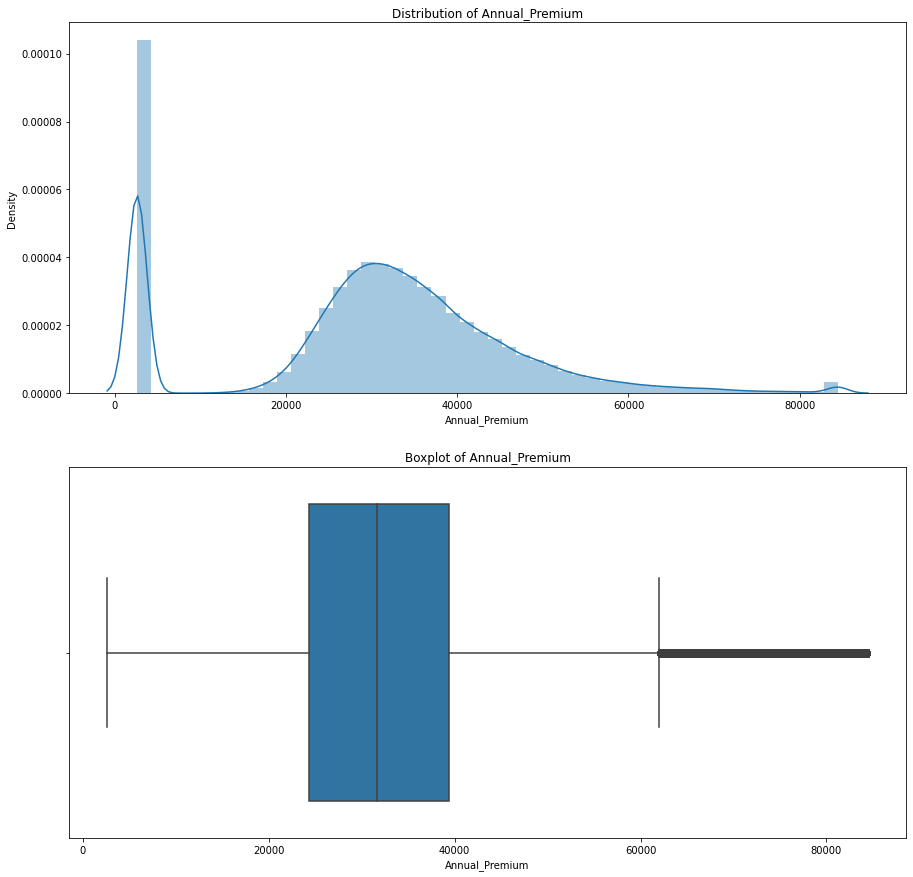

In [ ]:
num_summary_dist_box(data_wo_o, "Annual_Premium")

**Results:** There are 2423 (0.48%) probable Annual_Premium outliers, to not delete them, their values were replaced with outer fence values.

In [ ]:
data_wo_o.to_pickle("/content/drive/MyDrive/AIS/BD_ML_datasets/Health_Insurance_Cross_Sell_Prediction/insurance_int_wo.pkl")

### Policy Sales Channels

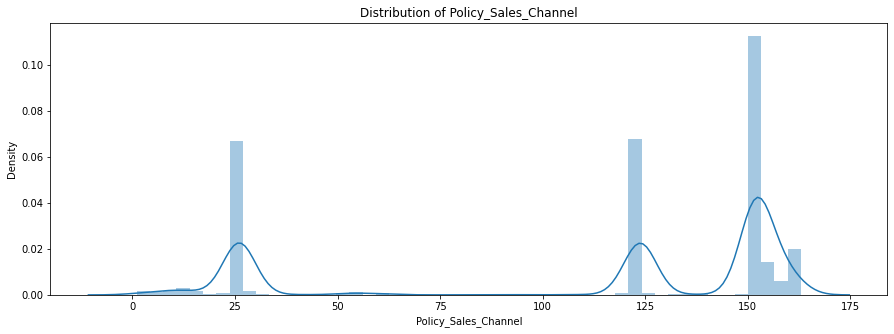

In [ ]:
plt.figure(figsize=(15, 5))
sns.distplot(data['Policy_Sales_Channel'])
plt.title(f"Distribution of Policy_Sales_Channel")
plt.show()

**Results:**

*   Policy_Sales_Channel is dispersed around some dominating points.
*   The most used codes for the channel of outreaching to the customer are 25, 125, 150.

### Vintage

*Number of Days, Customer has been associated with the company*

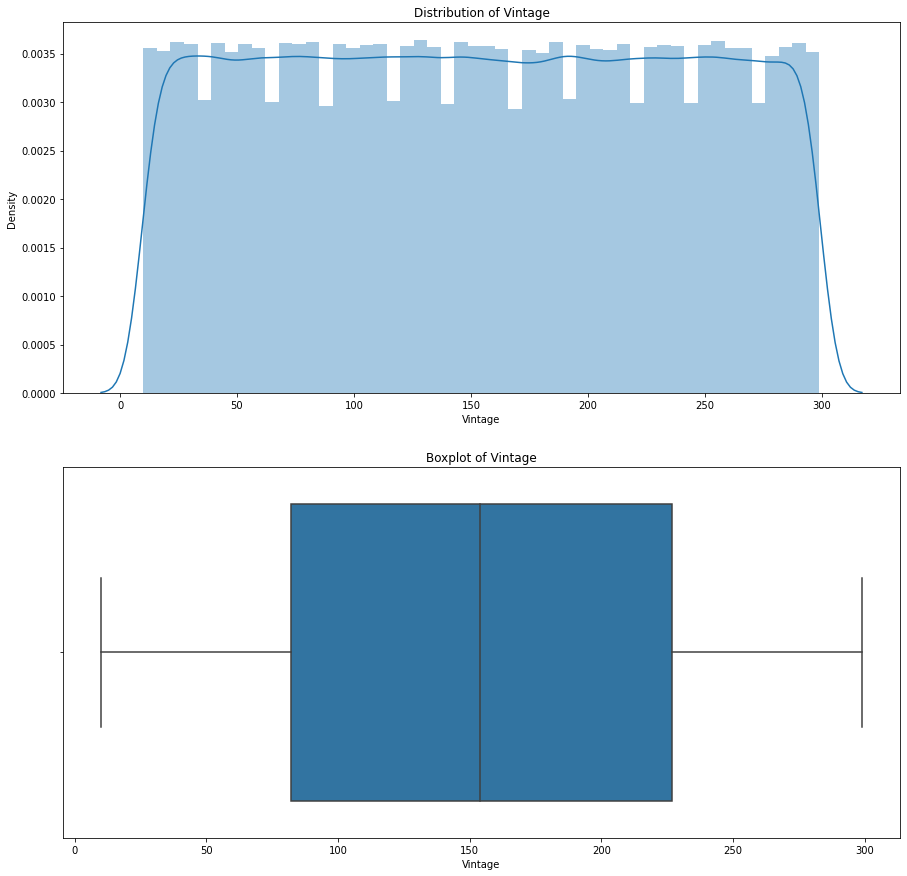

In [ ]:
num_summary_dist_box(data, "Vintage")

**Results:**
*   Vintage is uniformly distributed.



## Label encoding

To check relationships data should be encoded. For this, the dataset that was previously saved in a "insurance_int_wo.pkl" file will be used.

In [ ]:
data = pd.read_pickle(data_path + "/insurance_int_wo.pkl")

In [ ]:
for i in CategoricalVariables:
  print(i, data[i].unique())

Gender ['Male' 'Female']
Vehicle_Age ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Damage ['Yes' 'No']
Driving_License [1 0]
Previously_Insured [0 1]
Response [1 0]
Policy_Sales_Channel [ 26 152 160 124  14  13  30 156 163 157 122  19  22  15 154  16  52 155
  11 151 125  25  61   1  86  31 150  23  60  21 121   3 139  12  29  55
   7  47 127 153  78 158  89  32   8  10 120  65   4  42  83 136  24  18
  56  48 106  54  93 116  91  45   9 145 147  44 109  37 140 107 128 131
 114 118 159 119 105 135  62 138 129  88  92 111 113  73  36  28  35  59
  53 148 133 108  64  39  94 132  46  81 103  90  51  27 146  63  96  40
  66 100  95 123  98  75  69 130 134  49  97  38  17 110  80  71 117  58
  20  76 104  87  84 137 126  68  67 101 115  57  82  79 112  99  70   2
  34  33  74 102 149  43   6  50 144 143  41 141 142]
Region_Code [28  3 11 41 33  6 35 50 15 45  8 36 30 26 16 47 48 19 39 23 37  5 17  2
  7 29 46 27 25 13 18 20 49 22 44  0  9 31 12 34 21 10 14 38 24 40 43 32
  4 51 42  1 52]


Driving_License, Previously_Insured, Policy_Sales_Channel, Region_Code  and Response are already presented in numerical form.

In [ ]:
data["Gender"] = data["Gender"].replace({"Female": 0, "Male": 1})
data["Vehicle_Age"] = data["Vehicle_Age"].replace({"< 1 Year": 0, "1-2 Year": 1, "> 2 Years": 2})
data["Vehicle_Damage"] = data["Vehicle_Damage"].replace({"No": 0, "Yes": 1})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  int64  
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  int64  
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  int64  
 7   Vehicle_Damage        508146 non-null  int64  
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  int64  
 10  Vintage               508146 non-null  int64  
 11  Response              508146 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 46.5 MB


In [ ]:
data = data.drop(['id'], inplace=False, axis=1)

In [ ]:
data.to_pickle("/content/drive/MyDrive/AIS/BD_ML_datasets/Health_Insurance_Cross_Sell_Prediction/insurance_int_wo_cat.pkl")

## Relationship

### Correlations

In [ ]:
data = pd.read_pickle(data_path + "/insurance_int_wo_cat.pkl")

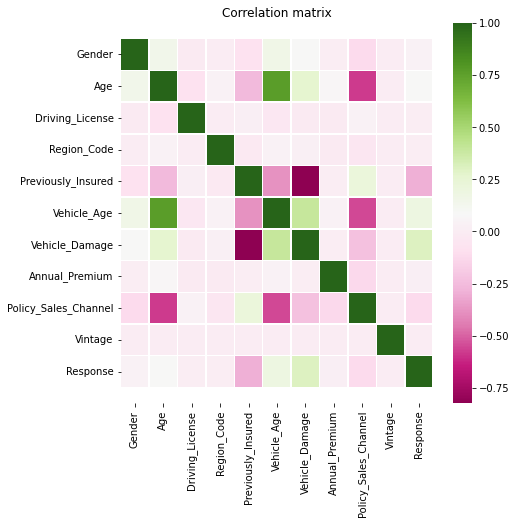

In [ ]:
# Illustration of correlation matrix 
correlation_matrix = data.corr()
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.heatmap(correlation_matrix,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="PiYG");
bottom_pagging, top_pagging = ax.get_ylim()
ax.set_ylim(bottom_pagging + 0.5, top_pagging - 0.5)
plt.title("Correlation matrix")
plt.show()

In [ ]:
# Target variable distribution
print("Target variable distribution")
data[data.columns[:]].corr()["Response"][:-1]

Target variable distribution


Gender                  0.045214
Age                     0.094979
Driving_License         0.008318
Region_Code             0.008574
Previously_Insured     -0.290704
Vehicle_Age             0.189002
Vehicle_Damage          0.302072
Annual_Premium          0.019353
Policy_Sales_Channel   -0.117930
Vintage                -0.000867
Name: Response, dtype: float64

The most relevant is the relation between "Response" and the rest of the variables. There are some correlations between target value and Vehicle_Damage, and negative relation with binary "Previously_Insured" variable.

There are also relationships between other variables:
*  Age is strongly correlated with Vechicle_Age and a little bit weaker with Policy_Sales_Channel.
*  Previously_Insured is strongly correlated with Vehicle_Damage and weaker with Age and Vehicle_Age.
*  Vehicle_Age and Policy_Sales_Channel - this is interesting spurious effect. The real underlying effect is relation between Age and Policy_Sales_Channel, indirectly influencing numbers for age of vehicle. Vehicle_Age is also correlated with Vehicle_Damage.

For graphs below "insurance_int_wo.pkl" file will be used.

In [ ]:
data = pd.read_pickle(data_path + "/insurance_int_wo.pkl")

### Response/Gender

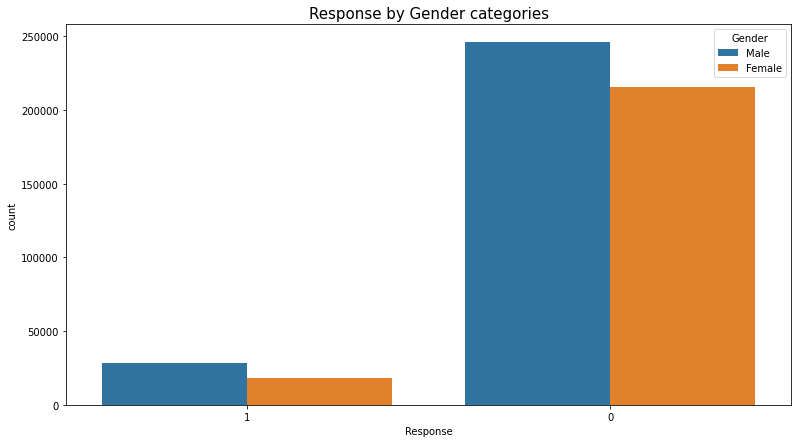

In [ ]:
plt.figure(figsize=(13, 7))
plt.title("Response by Gender categories", fontsize=15)
sns.countplot(data['Response'], hue=data["Gender"])
plt.show()

**Results:**
*   Male category is slightly greater than female and chances of buying the insurance is also little high.

*   Gender does not play much role in Response of the Customer and the ratio for both positive and negative response is almost equal.

### Response/Age

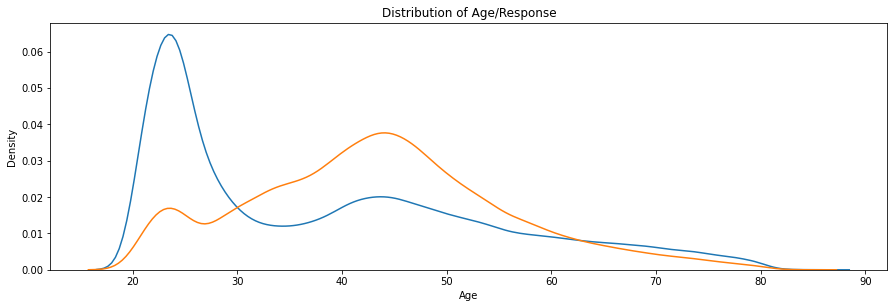

In [ ]:
num_summary_by_response(data, "Age", False)

**Results:**
*   Most of customers that are interested in vehicle insurance (positive response) are between 30 and 50 years old.



### Age/Vehicle_Age

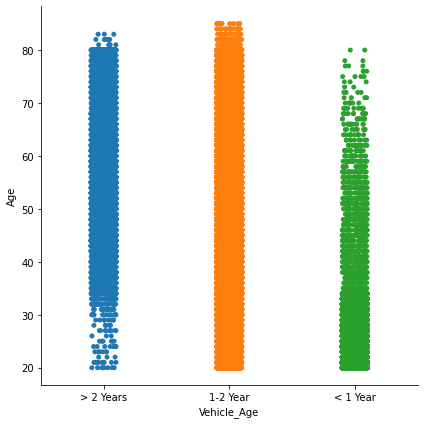

In [ ]:
sns.catplot(x="Vehicle_Age", y="Age", data=data, height=6)
plt.show()

### Response/Gender/Age

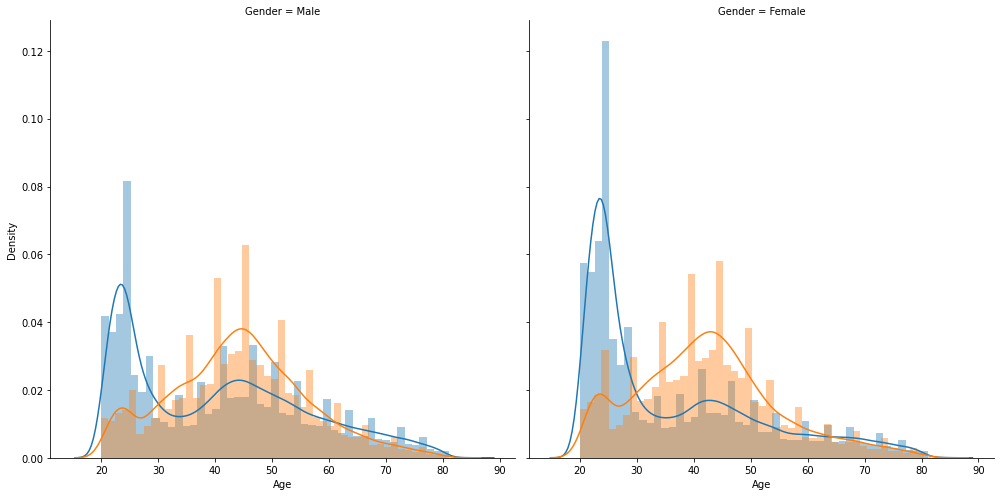

In [ ]:
face_grid = sns.FacetGrid(data, col="Gender", hue="Response", height=7)
face_grid.map(sns.distplot, "Age")
plt.show()

### Responce/Driving_License

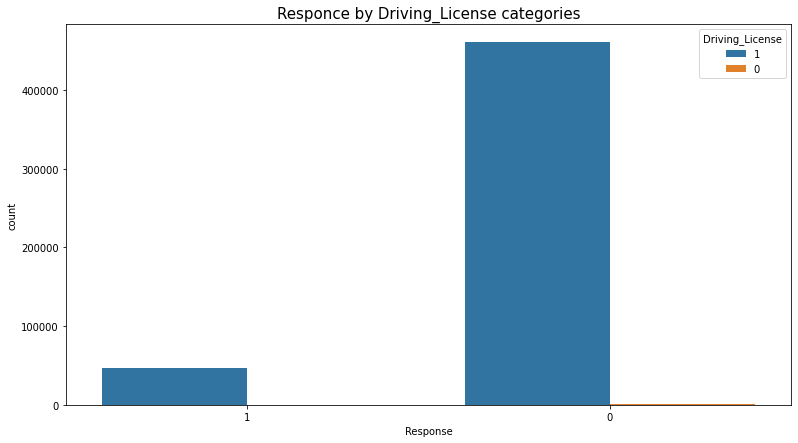

In [ ]:
plt.figure(figsize=(13, 7))
plt.title("Responce by Driving_License categories", fontsize=15)
sns.countplot(data["Response"], hue=data['Driving_License'])
plt.show()

**Results:**
*   Almost all customers who are interested in Vehicle Insurance have driving license.
*   Having a driver's license doesn't play much of a role in customer feedback.


### Response/Region_Code

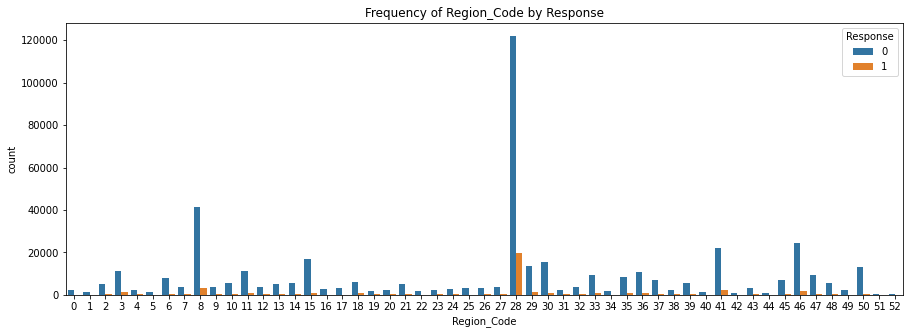

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data['Region_Code'], hue=data['Response'])
plt.title(f"Frequency of Region_Code by Response")
plt.show()

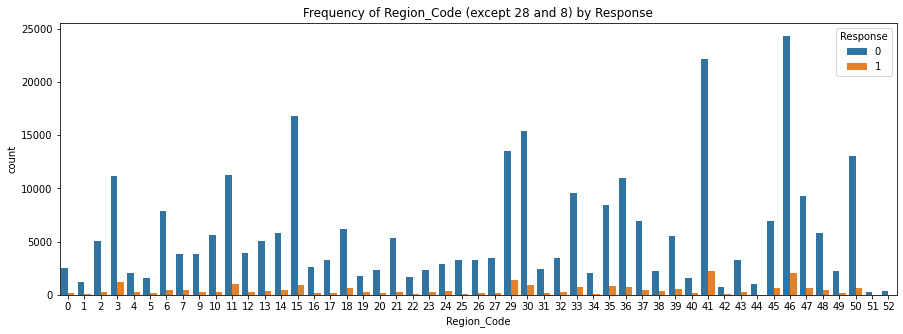

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data[(data['Region_Code']!=28) & (data['Region_Code']!=8)]['Region_Code'], hue=data['Response'])
plt.title(f"Frequency of Region_Code (except 28 and 8) by Response")
plt.show()

**Results:**

*   Region Code 28 prevails.
*   Region_Code and Responce data are weakly correlated.

### Response/Previously_Insured

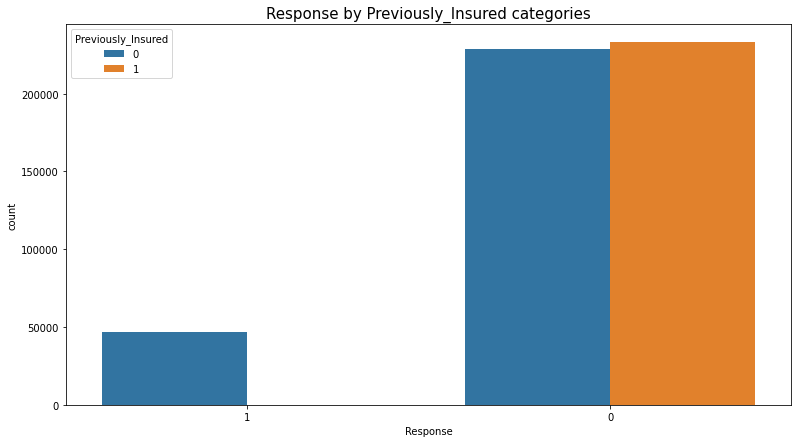

In [ ]:
plt.figure(figsize=(13, 7))
plt.title("Response by Previously_Insured categories", fontsize=15)
sns.countplot(data["Response"], hue=data['Previously_Insured'])
plt.show()

In [ ]:
data[(data['Previously_Insured']==1)&(data['Response']==1)].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,158.000000,158.000000,158.0,158.000000,158.0,158.000000,158.000000,158.000000,158.0
mean,194754.189873,35.696203,1.0,25.000000,1.0,26890.708861,123.537975,156.253165,1.0
std,112478.480815,11.830388,0.0,13.827877,0.0,15763.699039,48.744314,85.333959,0.0
min,4800.000000,20.000000,1.0,0.000000,1.0,2630.000000,1.000000,13.000000,1.0
25%,85980.000000,25.000000,1.0,11.000000,1.0,21681.250000,124.000000,82.000000,1.0
50%,212459.000000,35.000000,1.0,28.000000,1.0,29521.500000,152.000000,151.000000,1.0
75%,281753.250000,42.750000,1.0,36.000000,1.0,35419.250000,154.000000,228.500000,1.0
max,380630.000000,75.000000,1.0,50.000000,1.0,78765.000000,163.000000,299.000000,1.0


**Results:**
*   Most of the customers are new customers, only few customers signedup from existing customer base.

### Previously_Insured/Vehicle_Age

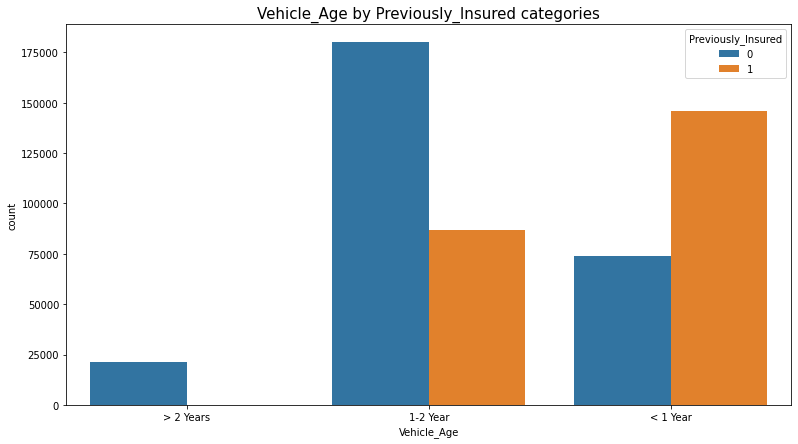

In [ ]:
plt.figure(figsize=(13, 7))
plt.title("Vehicle_Age by Previously_Insured categories", fontsize=15)
sns.countplot(data["Vehicle_Age"], hue=data['Previously_Insured'])
plt.show()

### Previously_Insured/Age

Text(0.5, 1.0, 'Distribution of Age/Previously_Insured')

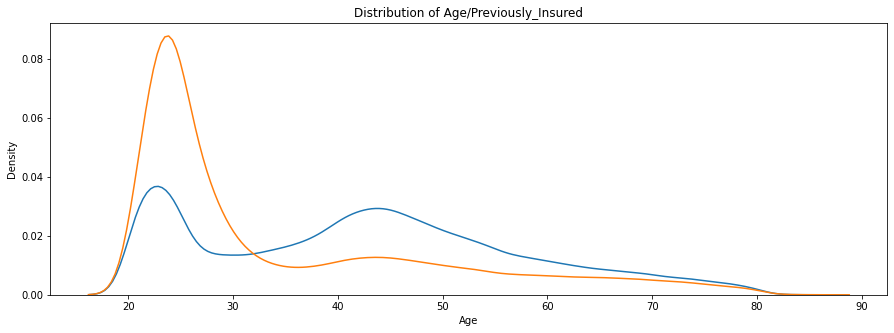

In [ ]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data.loc[data['Previously_Insured']==0, "Age"], label='0', legend=True)
sns.kdeplot(data.loc[data['Previously_Insured']==1, "Age"], label='1', legend=True)
plt.title(f"Distribution of Age/Previously_Insured")

Age distribution according to Previously_Insured


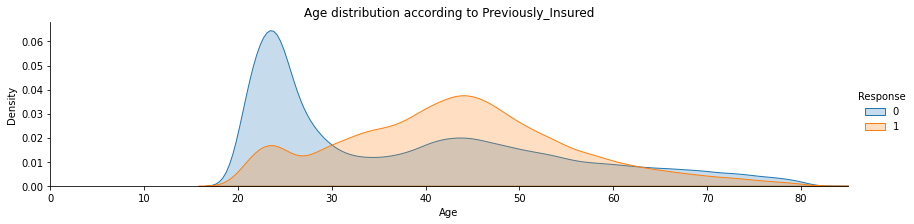

In [ ]:
print("Age distribution according to Previously_Insured")
facetgrid = sns.FacetGrid(data, hue="Response",aspect = 4)
facetgrid.map(sns.kdeplot,"Age",shade = True)
facetgrid.set(xlim = (0, data["Age"].max()))
facetgrid.add_legend()
plt.title(f"Age distribution according to Previously_Insured")
plt.show()

### Response/Vehicle_Age

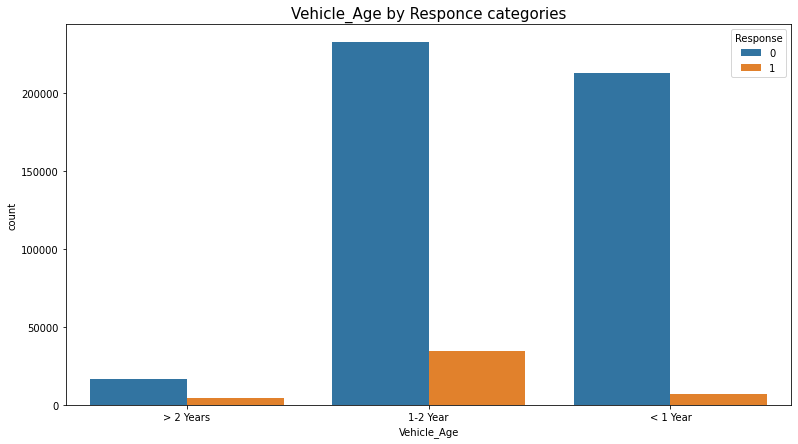

In [ ]:
plt.figure(figsize=(13, 7))
plt.title("Vehicle_Age by Responce categories", fontsize=15)
sns.countplot(data["Vehicle_Age"], hue=data['Response'])
plt.show()

**Results:**

*   Mostly Vehicle_Age is 1-2 Year.
*   The dataset does not contain many vehicles older than 2 years, but the percentage of owners of such vehicles who are interested in a car insuring is higher than those who are not interested.



### Vehicle_Age/Vehicle_Damage

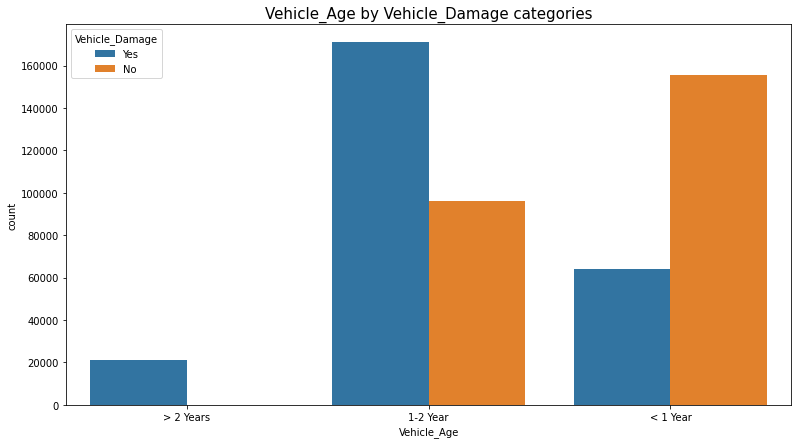

In [ ]:
plt.figure(figsize=(13, 7))
plt.title("Vehicle_Age by Vehicle_Damage categories", fontsize=15)
sns.countplot(data["Vehicle_Age"], hue=data['Vehicle_Damage'])
plt.show()

**Results:**
*   The older the car, the more likely it is to have damage.

### Previously_Insured/Vehicle_Damage

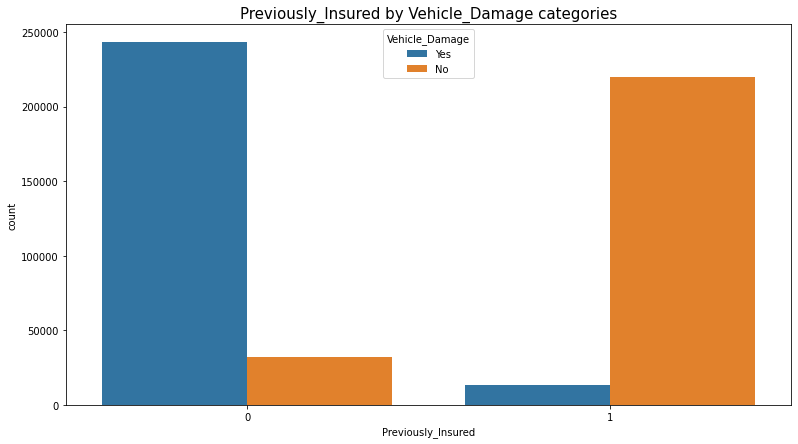

In [ ]:
plt.figure(figsize=(13, 7))
plt.title("Previously_Insured by Vehicle_Damage categories", fontsize=15)
sns.countplot(data["Previously_Insured"], hue=data['Vehicle_Damage'])
plt.show()

### Response/Vechicle_Damage

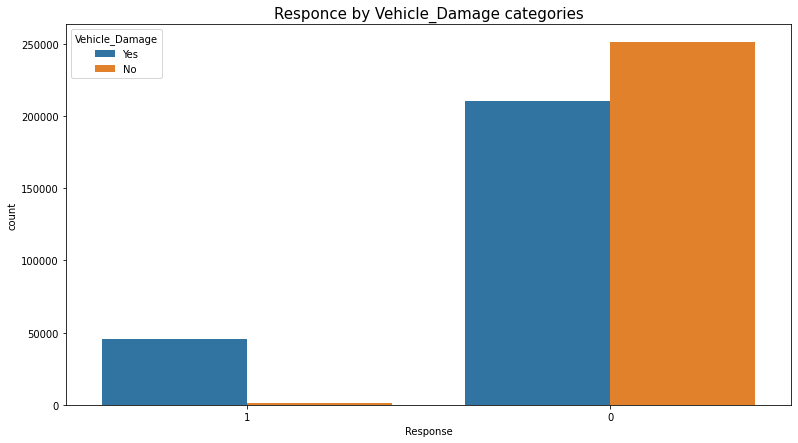

In [ ]:
plt.figure(figsize=(13, 7))
plt.title("Responce by Vehicle_Damage categories", fontsize=15)
sns.countplot(data["Response"], hue=data['Vehicle_Damage'])
plt.show()

**Results:**
*   Customers with vechicle damage are more interested in vehicle insurance.



### Annual

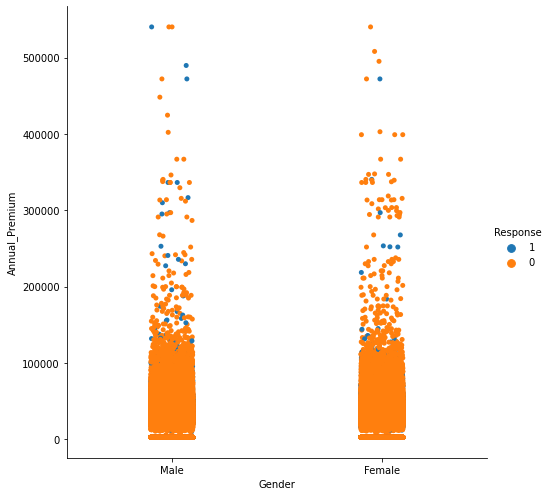

In [ ]:
# plt.figure(figsize=(10, 5))
#sns.set(rc={'figure.figsize':(15,8.27)})
sns.catplot(x="Gender", y="Annual_Premium",hue="Response", data=data, height=7)
plt.show()

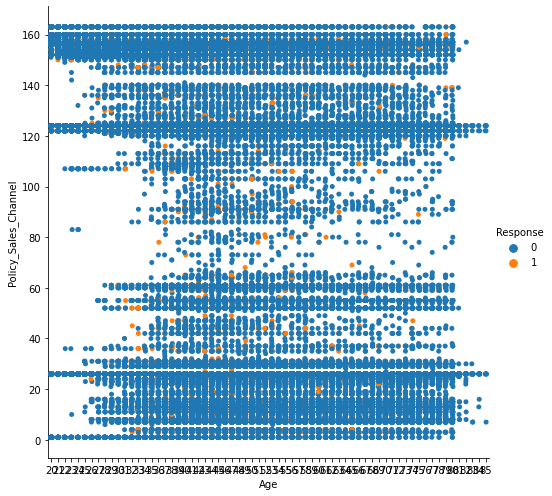

In [ ]:
# plt.figure(figsize=(10, 5))
#sns.set(rc={'figure.figsize':(15,8.27)})
sns.catplot(x="Age", y="Policy_Sales_Channel",hue="Response", data=data, height=7)
plt.show()

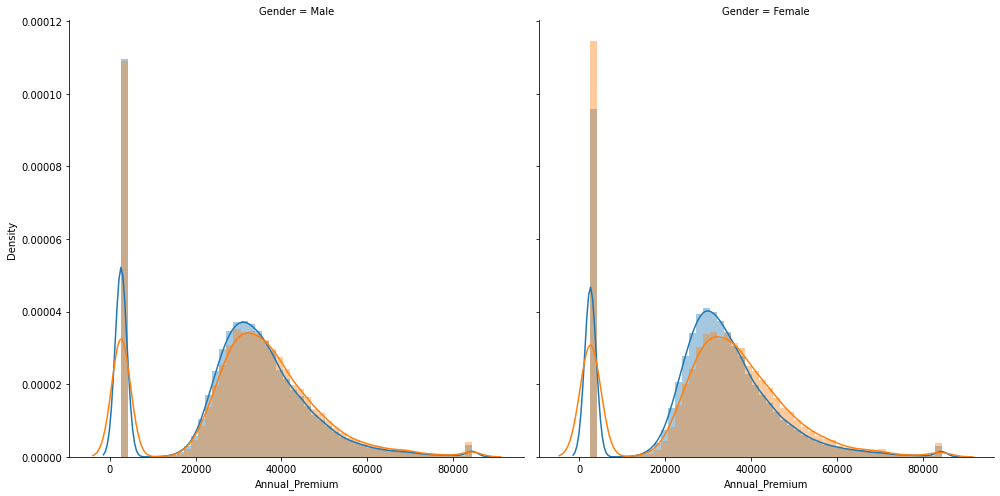

In [ ]:
face_grid = sns.FacetGrid(data, col="Gender", hue="Response", height=7)
face_grid.map(sns.distplot, "Annual_Premium")
plt.show()

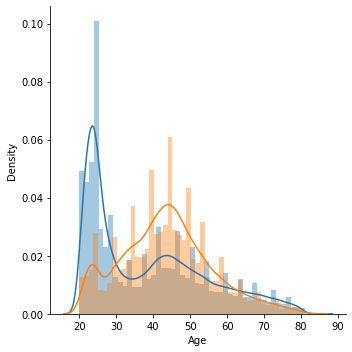

In [ ]:
face_grid = sns.FacetGrid(data, hue="Response", height=5)
face_grid.map(sns.distplot, "Age")

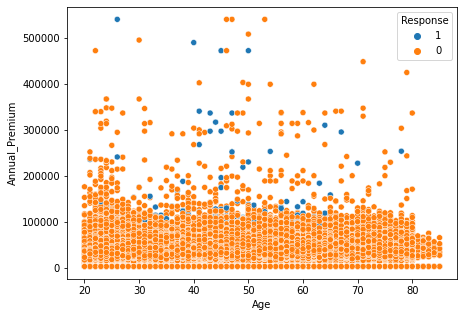

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x="Age", y="Annual_Premium",hue="Response", data=data)
plt.show()

**Annnual_Premium|Age**

In [ ]:
# Create a list of top-10 ages
age_10 = data['Age'].value_counts()
age_10 = list(age_10[age_10.values > 11100].index)
age_10

[24, 23, 22, 25, 21, 26, 27, 28, 44, 43]

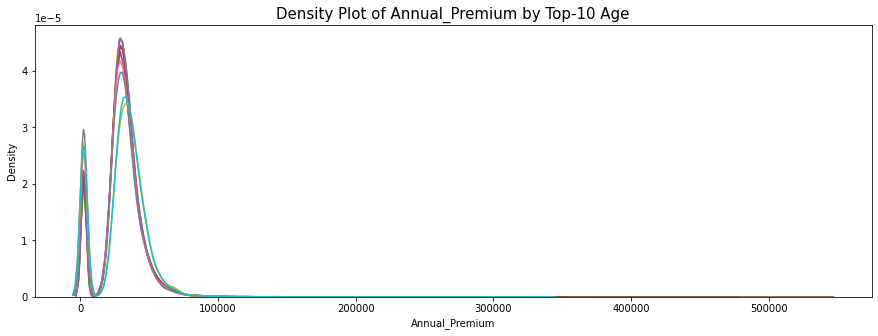

In [ ]:
plt.figure(figsize=(15, 5))

for a in age_10:
    subset = data[data['Age'] == a]
    sns.kdeplot(subset['Annual_Premium'], label = a)

    
# label the plot
# sns.kdeplot(data["Age"])
# plt.xlabel('Age')
# plt.ylabel('Density')
plt.title('Density Plot of Annual_Premium by Top-10 Age', size = 15)
plt.show()

**Results:** The top 10 included ages 21-28 and 43-44, 
customers from this age categories mostly has annual_premium up to 100 000.

In [ ]:
age_last10 = np.sort(data['Age'].unique()[-5:])
print(f'The last 10 age values {age_last10}')

The last 10 age values [80 81 82 83 85]


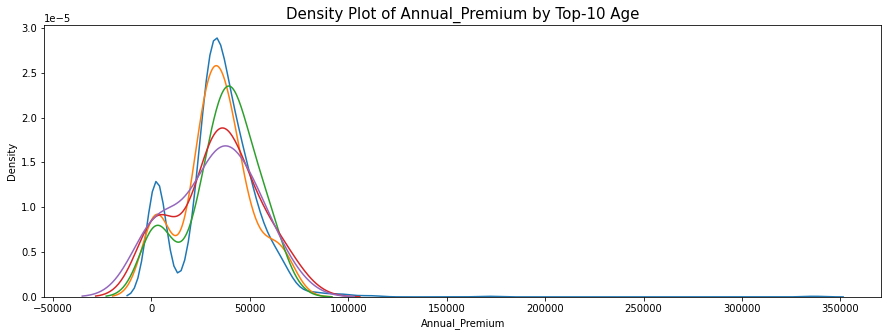

In [ ]:
plt.figure(figsize=(15, 5))

for a in age_last10:
    subset = data[data['Age'] == a]
    sns.kdeplot(subset['Annual_Premium'], label = a, shade = False, legend=True)

plt.title('Density Plot of Annual_Premium by Top-10 Age', size = 15)
plt.show()

**Results:** Customers from age category 80-85 also mostly has annual_premium up to 50 000.

In [ ]:
data_an_pr = data[data["Annual_Premium"]>150000].copy()

In [ ]:
data_an_pr_a = data[(data["Age"]<30)].copy()

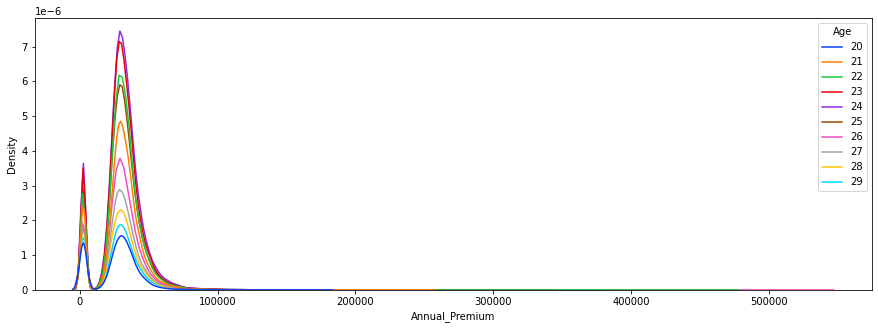

In [ ]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data_an_pr_a['Annual_Premium'], hue=data_an_pr_a["Age"], palette='bright')
plt.show()

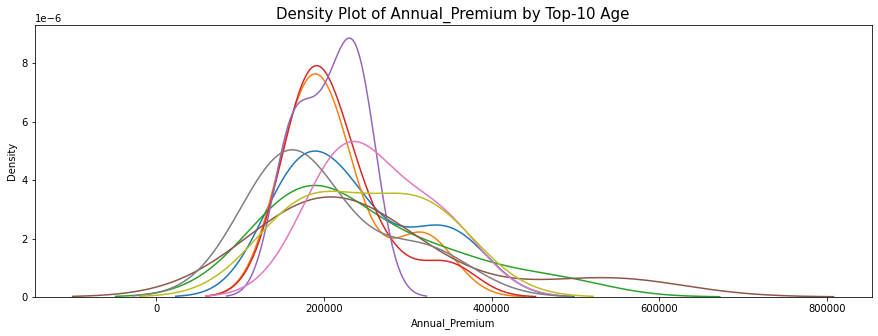

In [ ]:
plt.figure(figsize=(15, 5))
for a in age_10:
    subset = data_an_pr[data_an_pr['Age'] == a]
    sns.kdeplot(subset['Annual_Premium'], label = a)

plt.title('Density Plot of Annual_Premium by Top-10 Age', size = 15)
plt.show()

In [ ]:
age = np.sort(data['Age'].unique())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density e

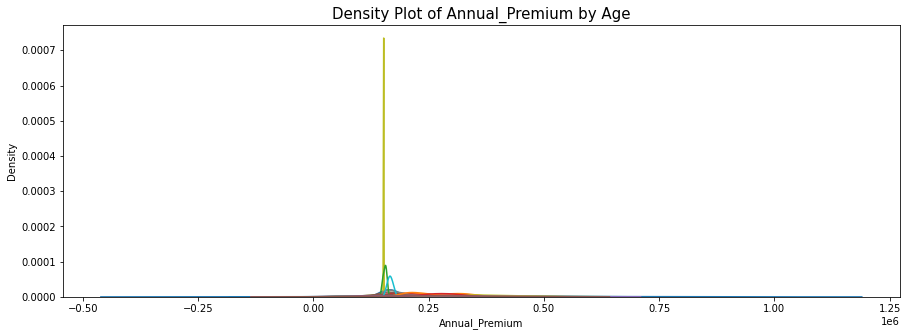

In [ ]:
plt.figure(figsize=(15, 5))

for a in age:
    subset = data_an_pr[data_an_pr['Age'] == a]
    sns.kdeplot(subset['Annual_Premium'], label = a)

    
# label the plot
# sns.kdeplot(data["Age"])
# plt.xlabel('Age')
# plt.ylabel('Density')
plt.title('Density Plot of Annual_Premium by Age', size = 15)
plt.show()

### Annual_Premium/Vehicle_Damage

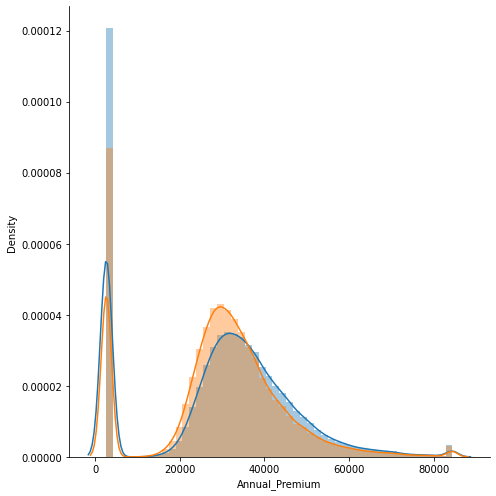

In [ ]:
face_grid = sns.FacetGrid(data, hue="Vehicle_Damage", height=7)
face_grid.map(sns.distplot, "Annual_Premium")
plt.show()

### Response/Policy_Sales_Channel

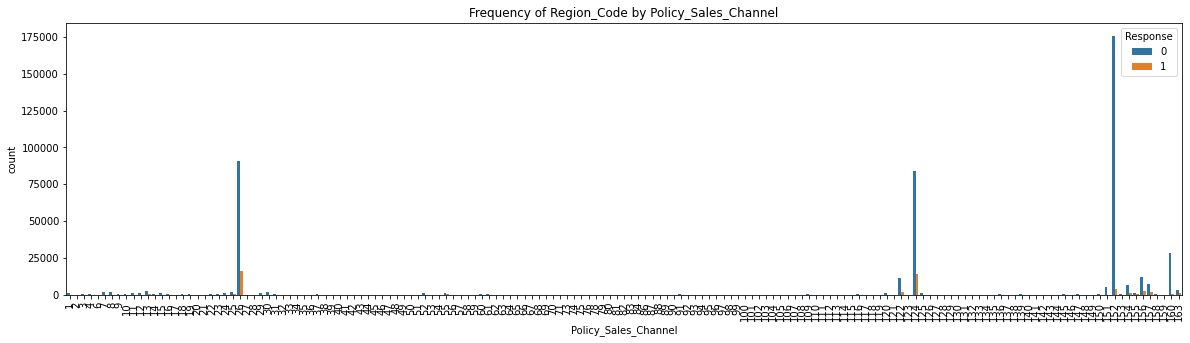

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(data['Policy_Sales_Channel'], hue=data['Response'])
plt.title(f"Frequency of Region_Code by Policy_Sales_Channel")
plt.xticks(rotation=90)
plt.show()

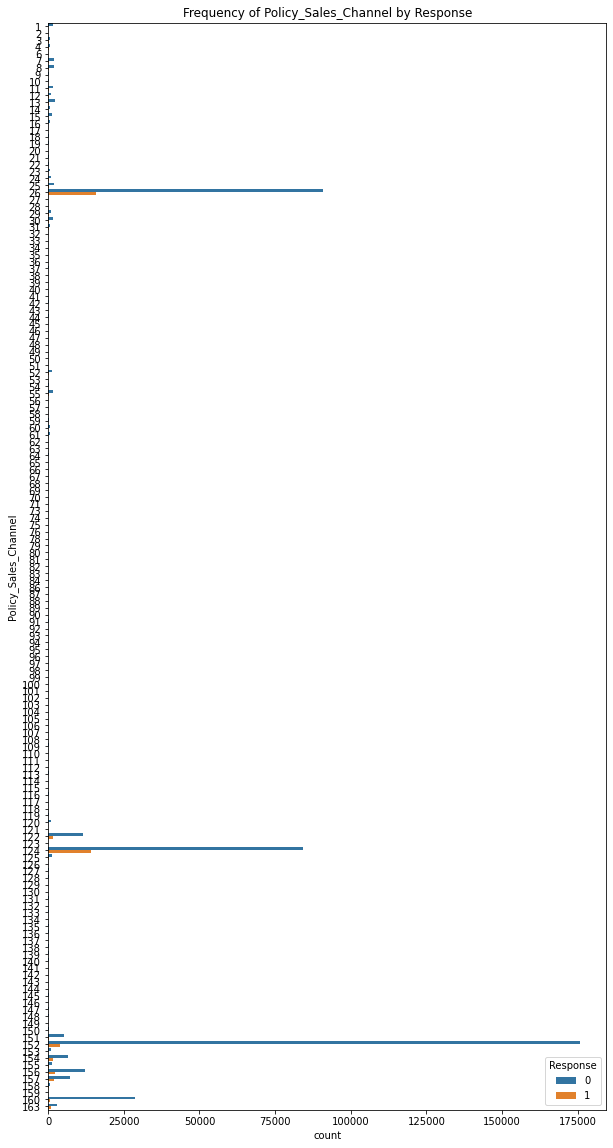

In [ ]:
plt.figure(figsize=(10, 20))
sns.countplot(y=data['Policy_Sales_Channel'], hue=data['Response'], orient='h')
plt.title(f"Frequency of Policy_Sales_Channel by Response")
# plt.xticks(rotation=90)
plt.show()

In [ ]:
pd.set_option("display.max_rows", None)
data['Policy_Sales_Channel'].value_counts()

152    179523
26     106594
124     98299
160     29090
156     14313
122     13239
157      8958
154      7988
151      5271
163      3850
13       2498
25       2407
7        2157
8        2027
30       1897
55       1679
11       1601
155      1592
1        1460
52       1447
125      1332
15       1201
29       1153
120      1012
12       1010
24        994
31        875
153       819
14        812
61        767
16        694
60        689
3         677
4         656
158       647
23        559
22        437
150       417
10        345
19        295
147       258
136       247
145       235
18        222
109       221
9         220
116       219
91        215
139       204
37        203
21        192
128       190
42        184
59        175
131       168
138       165
113       152
127       141
119       140
54        140
44        135
135       131
140       130
64        110
133       105
148        97
103        94
35         91
111        88
132        86
65         85
121   

In [ ]:
data_response = data[data['Response']==1].copy()
data_response

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
7,8,Female,56,1,28,0,1-2 Year,Yes,32031.0,26,72,1
10,11,Female,47,1,35,0,1-2 Year,Yes,47576.0,124,46,1
15,16,Male,37,1,6,0,1-2 Year,Yes,2630.0,156,147,1
...,...,...,...,...,...,...,...,...,...,...,...,...
381057,381058,Male,40,1,46,0,1-2 Year,Yes,27508.0,26,189,1
381061,381062,Female,41,1,28,0,1-2 Year,Yes,37377.0,124,99,1
381073,381074,Female,46,1,28,0,1-2 Year,Yes,34741.0,124,167,1
381075,381076,Female,61,1,28,0,1-2 Year,Yes,43875.0,26,139,1


In [ ]:
data_response['Policy_Sales_Channel'].value_counts()==1

26     False
124    False
152    False
156    False
157    False
       ...  
62      True
123     True
28      True
69      True
39      True
Name: Policy_Sales_Channel, Length: 121, dtype: bool

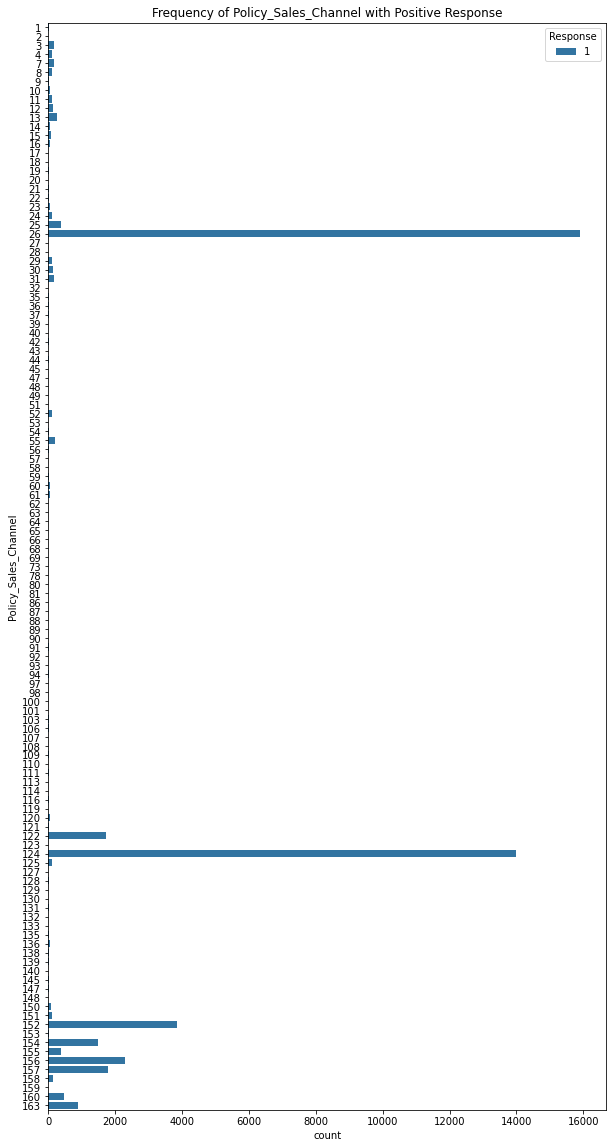

In [ ]:
plt.figure(figsize=(10, 20))
sns.countplot(y=data_response['Policy_Sales_Channel'], hue=data_response['Response'], orient='h')
plt.title(f"Frequency of Policy_Sales_Channel with Positive Response")
# plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(data['Policy_Sales_Channel'], hue=data['Response'])
plt.title(f"Frequency of Region_Code by Policy_Sales_Channel")
plt.xticks(rotation=90)
plt.show()

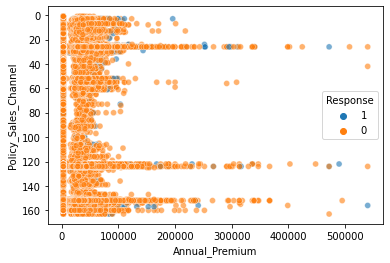

In [ ]:
# sns.set(rc={"figure.figsize":(3, 4)}) #width=3, #height=4
sns.scatterplot(x="Annual_Premium", y="Policy_Sales_Channel",hue="Response", data=data, alpha=0.6)
plt.show()

**Results:**

*   Policy_Sales_Channel is dispersed around some dominating points.
*   The most used codes for the channel of outreaching to the customer are 25, 125, 150.
*   For positive repsponse mostly used code 25 and 125.



### Response/Vintage

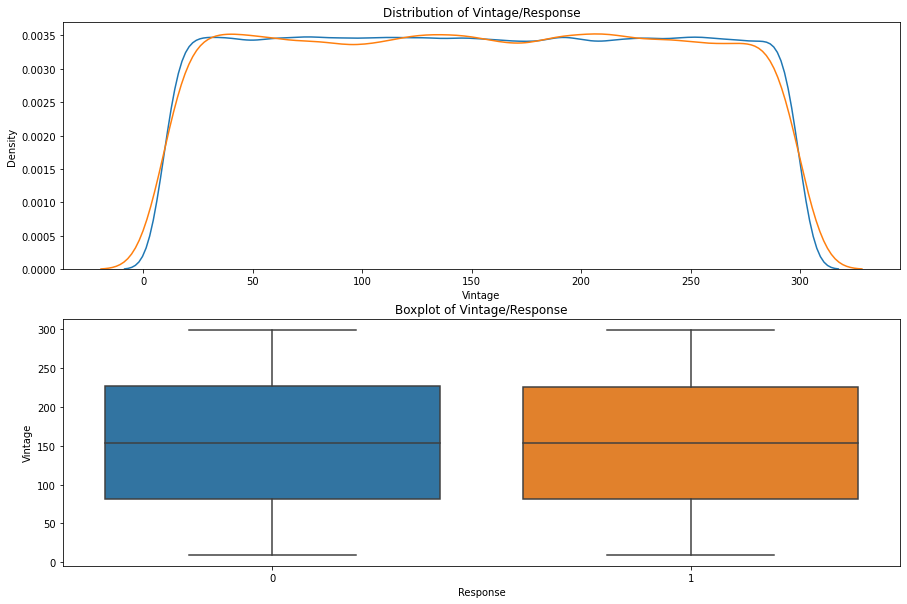

In [ ]:
num_summary_by_response(data, 'Vintage')

**Results:**
*   It seems that the Vintage has no effect on the response. 
*   The rate of positive and negative feedback seems to be about the same.



In [ ]:
data = data.drop(['Vintage'], inplace=False, axis=1)

In [ ]:
data.to_pickle("/content/drive/MyDrive/AIS/BD_ML_datasets/Health_Insurance_Cross_Sell_Prediction/insurance_int_wo_cat1.pkl")

# Splitting Data

In [ ]:
data = pd.read_pickle(data_path + "/insurance_int_wo_cat1.pkl")

In [ ]:
# Splitting data into test and train

def split_data_to_test_and_train(x, y):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    Y_test = Y_test.reset_index()["Response"]
    X_test = X_test.reset_index().iloc[:,1:]
    return X_train, X_test, Y_train, Y_test

x = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, Y_train, Y_test = split_data_to_test_and_train(x, y)
print(f"Data to train: \n{pd.value_counts(Y_train)}")
print(f"Data to test: \n{pd.value_counts(Y_test)}")

Data to train: 
0    369147
1     37369
Name: Response, dtype: int64
Data to test: 
0    92289
1     9341
Name: Response, dtype: int64


### other

In [ ]:
resp = data_fe.columns.get_loc("Response")
x = data_fe.iloc[:,:-1]
y = data_fe.iloc[:,resp]
X_train, X_test, Y_train, Y_test = split_data_to_test_and_train(x, y)
print(f"Data to train: \n{pd.value_counts(Y_train)}")
print(f"Data to test: \n{pd.value_counts(Y_test)}")

Data to train: 
0    369147
1     37369
Name: Response, dtype: int64
Data to test: 
0    92289
1     9341
Name: Response, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
data_fe[['Age']] = ss.fit_transform(data_fe[['Age']])

mm = MinMaxScaler()
data_fe[['Annual_Premium']] = mm.fit_transform(data_fe[['Annual_Premium']])

# Balancing the target variable

**Upsample**

In [ ]:
#combining train features and target
df = pd.concat([X_train,Y_train], axis=1)

from sklearn.utils import resample, shuffle

df_majority = df[df['Response']==0]
df_minority = df[df['Response']==1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=Y_train.value_counts()[0], random_state = 42)
balanced_df = pd.concat([df_minority_upsampled,df_majority])
balanced_df = shuffle(balanced_df)
print(balanced_df.Response.value_counts())

X_train = balanced_df.drop('Response',axis=1)
Y_train = balanced_df['Response']

1    369147
0    369147
Name: Response, dtype: int64


**Downsample**

In [ ]:
#combining train features and target
df = pd.concat([X_train,Y_train], axis=1)
from sklearn.utils import resample, shuffle

df_majority = df[df['Response']==0]
df_minority = df[df['Response']==1]
df_majority_downsampled = resample(df_majority,replace=False, n_samples=pd.value_counts(Y_train)[1], random_state = 123)
balanced_df = pd.concat([df_minority,df_majority_downsampled])
balanced_df = shuffle(balanced_df)
print(balanced_df.Response.value_counts())

X_train = balanced_df.drop('Response',axis=1)
Y_train = balanced_df['Response']

0    37369
1    37369
Name: Response, dtype: int64


**Weight balanced**

In [ ]:
target_class_weight = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(Y_train), y = Y_train)
weights = {0:target_class_weight[0], 1: target_class_weight[1]}
print(f"Target variable classes balanced to {weights}")

Target variable classes balanced to {0: 0.5506153375213668, 1: 5.4392143220316305}


# Scaling Data

In [ ]:
# Creating a function for scaling data by minmax or stand

def scale_by_minmax(train, test):
    minmax_scaler = MinMaxScaler(feature_range=(0, 1))
    train = minmax_scaler.fit_transform(train)
    test = minmax_scaler.transform(test)
    return train, test
     
def scale_by_stand(train, test):
    train = scale(train)
    test = scale(test)
    return train, test

scaling_switcher = {
    "minmax": scale_by_minmax,
    "stand": scale_by_stand,
}

def scaling_data(train, test, scaling_method):
    func = scaling_switcher.get(scaling_method, None)
    if not func:
        print("Invalid scaling method")
    train, test = func(train, test)
    return train, test

scaling_list = ['minmax','stand']

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

minmax_scaler = MinMaxScaler()
X_train[['Annual_Premium']] = minmax_scaler.fit_transform(X_train[['Annual_Premium']])
X_test[['Annual_Premium']] = minmax_scaler.transform(X_test[['Annual_Premium']])

X_train[['Age']] = scale(X_train[['Age']])
X_test[['Age']] = scale(X_test[['Age']])

# Feature Selection

In [ ]:
def select_features_by_random_forest(train, test, flag):
    transformed_x = None
    des_tree_clf = RandomForestClassifier(random_state=42, n_estimators=100)
    des_tree_clf.fit(train, Y_train)
    des_tree_model = SelectFromModel(des_tree_clf, prefit=True)
    transformed_train = des_tree_model.transform(train)
    transformed_test = des_tree_model.transform(test)
    if flag:
        transformed_x = des_tree_model.transform(x)
    return transformed_train, transformed_test, transformed_x

feature_selection_switcher = {
    "random_forest": select_features_by_random_forest
}

def feature_selection(feature_selection_method, train = X_train, test = X_test, flag = False):
    func = feature_selection_switcher.get(feature_selection_method, None)
    if not func:
        print("Invalid feature selection method")
    transformed_train, transformed_test, transformed_x = func(train, test, flag)
    if flag:
        return transformed_train, transformed_test, transformed_x
    return transformed_train, transformed_test

feature_selection_list = ["random_forest"]

## Decision Tree

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     92289
           1       0.22      0.20      0.21      9341

    accuracy                           0.86    101630
   macro avg       0.57      0.57      0.57    101630
weighted avg       0.86      0.86      0.86    101630

Optimal features (2):
---------------------
Region_Code
Annual_Premium


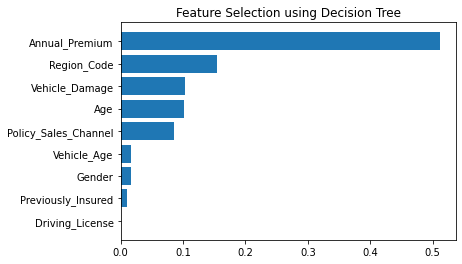

In [ ]:
# without Vintage
feat = data.drop(['Response'], axis=1).copy()

des_tree_clf = DecisionTreeClassifier(random_state=241, splitter="random", max_depth=40)
des_tree_clf.fit(X_train,Y_train)

results = des_tree_clf.predict(X_test)
report = classification_report(Y_test, results)
print(report)

des_tree_selector = SelectFromModel(des_tree_clf, prefit=True)
feature_idx = des_tree_selector.get_support()
feature_names = feat.columns[feature_idx]
# print("Optimal features number -", len(feature_names))
print(f"Optimal features ({len(feature_names)}):", '-'*21, sep="\n")
for feature_name in feature_names:
    print(feature_name)

f_i = list(zip(X_train.columns, des_tree_clf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.title("Feature Selection using Decision Tree")
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

## Random Forest

Optimal features number - 3
Features names:
---------------
Age
Region_Code
Annual_Premium


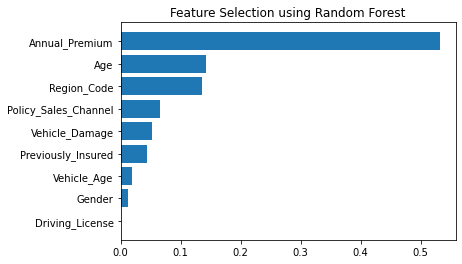

In [ ]:
# without Vintage
rf_clf = RandomForestClassifier(random_state=42, n_estimators=20).fit(X_train, Y_train)
rf_selector = SelectFromModel(rf_clf, prefit=True)
feature_idx = rf_selector.get_support()
feature_names = feat.columns[feature_idx]
print("Optimal features number -", len(feature_names))
print("Features names:", '-'*15, sep="\n")
for feature_name in feature_names:
    print(feature_name)

f_i = list(zip(X_train.columns, rf_clf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.title("Feature Selection using Random Forest")
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

# Estimation

In [ ]:
# Creating a function for models estimation

def estimate_results(results, flag=None):
    TP = FP = TN = FN = 0
    for i in range(len(Y_test)):
        if Y_test[i] == 1:
            if results[i] == 1:
                TP+=1
            else:
                FN+=1
        if Y_test[i] == 0:
            if results[i] == 1:
                FP+=1
            else:
                TN+=1
    print(f"Accuracy - {int(accuracy_score(Y_test, results)*100)}%")
    print(f"Recall - {int(recall_score(Y_test, results)*100)}%")
    print(f"Precision - {int(precision_score(Y_test, results)*100)}%")
    print(f"F1-Score - {int(f1_score(Y_test, results)*100)}%")
    print(f"balanced accuracy score - {int(balanced_accuracy_score(Y_test, pred_y)*100)}%")
    # print(f"Cohen's kappa - {int(cohen_kappa_score(Y_test, results)*100)}%")

# Establishing a Baseline


In [ ]:
from sklearn.model_selection import cross_validate

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, Y_train)
scoring = ["accuracy", "balanced_accuracy"]
cv_result = cross_validate(dummy_clf, X_test, Y_test, scoring=scoring)
print(f"Accuracy score of a dummy classifier: {cv_result['test_accuracy'].mean():.3f}")
print(
    f"Balanced accuracy score of a dummy classifier: "
    f"{cv_result['test_balanced_accuracy'].mean():.3f}")


Accuracy score of a dummy classifier: 0.908
Balanced accuracy score of a dummy classifier: 0.500


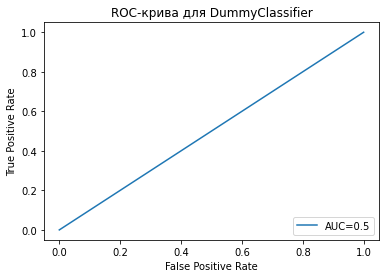

In [ ]:
dummy_clf_pred = dummy_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  dummy_clf_pred)
auc = metrics.roc_auc_score(Y_test, dummy_clf_pred)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.title("ROC-крива для DummyClassifier")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Basic Classifiers Results

## KNN

### without balancing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
print("No feature selection (initial dataset)\n")
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,Y_train)

results = knn_clf.predict(X_test)
# estimate_results(results)
report = classification_report(Y_test, results)
print(report)
print(f"balanced accuracy score: {round(balanced_accuracy_score(Y_test, results), 2)}")

No feature selection (initial dataset)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     92289
           1       0.26      0.09      0.13      9341

    accuracy                           0.89    101630
   macro avg       0.59      0.53      0.54    101630
weighted avg       0.85      0.89      0.87    101630

balanced accuracy score: 0.53


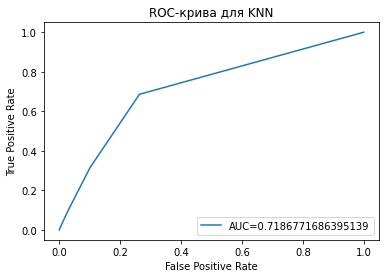

,Predicted Negative,Predicted Positive
Actual Negative,89860,2429
Actual Positive,8500,841


In [ ]:
knn_clf_pred = knn_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  knn_clf_pred)
auc = metrics.roc_auc_score(Y_test, knn_clf_pred)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.title("ROC-крива для KNN")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

display(pd.DataFrame(
    confusion_matrix(Y_test, results), 
    columns=["Predicted Negative", "Predicted Positive"],
    index=["Actual Negative", "Actual Positive"]))

### with balancing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
print("No feature selection (initial dataset)\n")
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,Y_train)

results = knn_clf.predict(X_test)
# estimate_results(results)
report = classification_report(Y_test, results)
print(report)
print(f"balanced accuracy score: {round(balanced_accuracy_score(Y_test, results), 2)}")

No feature selection (initial dataset)

              precision    recall  f1-score   support

           0       0.95      0.59      0.73     92289
           1       0.14      0.67      0.23      9341

    accuracy                           0.60    101630
   macro avg       0.54      0.63      0.48    101630
weighted avg       0.87      0.60      0.68    101630

balanced accuracy score: 0.63


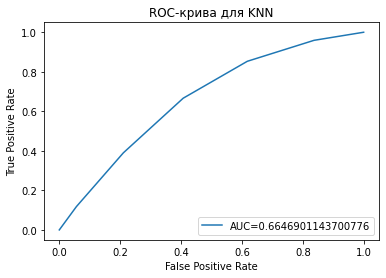

,Predicted Negative,Predicted Positive
Actual Negative,54720,37569
Actual Positive,3117,6224


In [ ]:
knn_clf_pred = knn_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  knn_clf_pred)
auc = metrics.roc_auc_score(Y_test, knn_clf_pred)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.title("ROC-крива для KNN")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

display(pd.DataFrame(
    confusion_matrix(Y_test, results), 
    columns=["Predicted Negative", "Predicted Positive"],
    index=["Actual Negative", "Actual Positive"]))

## Logistic Regression

In [ ]:
log_reg_clf = LogisticRegression(solver='newton-cg', class_weight=weights)
log_reg_clf.fit(X_train, Y_train)
results = log_reg_clf.predict(X_test)
print("No feature selection (initial dataset)\n")
pred_y = log_reg_clf.predict(X_test)
report = classification_report(Y_test, pred_y)
print(report)
print(f"balanced accuracy score: {round(balanced_accuracy_score(Y_test, pred_y), 2)}")

No feature selection (initial dataset)

              precision    recall  f1-score   support

           0       1.00      0.57      0.73     92289
           1       0.19      0.98      0.32      9341

    accuracy                           0.61    101630
   macro avg       0.59      0.78      0.52    101630
weighted avg       0.92      0.61      0.69    101630

balanced accuracy score: 0.78


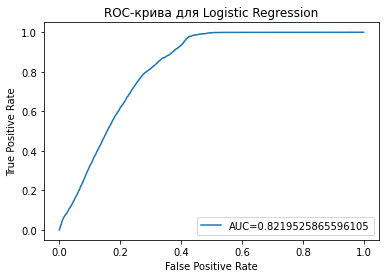

,Predicted Negative,Predicted Positive
Actual Negative,53066,39223
Actual Positive,215,9126


In [ ]:
log_res_clf_pred = log_reg_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  log_res_clf_pred)
auc = metrics.roc_auc_score(Y_test, log_res_clf_pred)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.title("ROC-крива для Logistic Regression")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

display(pd.DataFrame(
    confusion_matrix(Y_test, pred_y), 
    columns=["Predicted Negative", "Predicted Positive"],
    index=["Actual Negative", "Actual Positive"]))

In [ ]:
log_res_clf= LogisticRegression(solver='newton-cg', class_weight=weights)
print("Using feature selection\n")
for feature_selection_method in feature_selection_list:
  print (f"Feature selection method - {feature_selection_method}")
  train, test = feature_selection(feature_selection_method, X_train, X_test)
  log_res_clf.fit(train, Y_train)
  results = log_res_clf.predict(test)
  estimate_results(results)
  print('\n')

Using feature selection

Feature selection method - random_forest
Accuracy - 59%
Recall - 58%
Precision - 12%
F1-Score - 21%
balanced accuracy score - 77%




## Decision Tree

In [ ]:
print("No feature selection (initial dataset)\n")
des_tree_clf = DecisionTreeClassifier(random_state=241, splitter="random", class_weight=weights, max_depth=10)
des_tree_clf.fit(X_train, Y_train)
results = des_tree_clf.predict(X_test)
# estimate_results(results)

report = classification_report(Y_test, results)
print(report)
print(f"balanced accuracy score: {round(balanced_accuracy_score(Y_test, results), 2)}")

No feature selection (initial dataset)

              precision    recall  f1-score   support

           0       0.99      0.65      0.78     92289
           1       0.21      0.92      0.34      9341

    accuracy                           0.67    101630
   macro avg       0.60      0.79      0.56    101630
weighted avg       0.92      0.67      0.74    101630

balanced accuracy score: 0.79


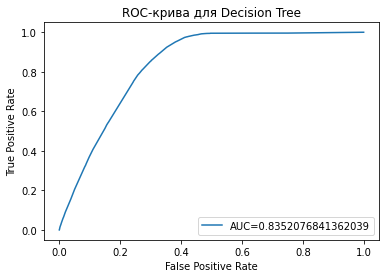

,Predicted Negative,Predicted Positive
Actual Negative,53066,39223
Actual Positive,215,9126


In [ ]:
des_tree_clf_pred = des_tree_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  des_tree_clf_pred)
auc = metrics.roc_auc_score(Y_test, des_tree_clf_pred)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.title("ROC-крива для Decision Tree")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

display(pd.DataFrame(
    confusion_matrix(Y_test, pred_y), 
    columns=["Predicted Negative", "Predicted Positive"],
    index=["Actual Negative", "Actual Positive"]))

In [ ]:
des_tree_clf = DecisionTreeClassifier(random_state=241, splitter="random", class_weight=weights, max_depth=10)
print("Using feature selection and scaling\n")
for feature_selection_method in feature_selection_list:
  print(f"Feature selection method - {feature_selection_method}")
  train, test = feature_selection(feature_selection_method, X_train, X_test)
  des_tree_clf.fit(train, Y_train)
  results = des_tree_clf.predict(test)
  estimate_results(results)
  print('\n')

Using feature selection and scaling

Feature selection method - random_forest
Accuracy - 57%
Recall - 77%
Precision - 14%
F1-Score - 25%
balanced accuracy score - 77%




## Random Forest

In [ ]:
print("No feature selection (initial dataset)\n")
random_forest_clf = RandomForestClassifier(random_state=41,  max_depth=5, n_estimators=30, class_weight=weights)
random_forest_clf.fit(X_train, Y_train)
results = random_forest_clf.predict(X_test)
# estimate_results(results)
report = classification_report(Y_test, results)
print(report)
print(f"balanced accuracy score: {round(balanced_accuracy_score(Y_test, results), 2)}")

No feature selection (initial dataset)

              precision    recall  f1-score   support

           0       0.99      0.63      0.77     92289
           1       0.21      0.94      0.34      9341

    accuracy                           0.66    101630
   macro avg       0.60      0.79      0.55    101630
weighted avg       0.92      0.66      0.73    101630

balanced accuracy score: 0.79


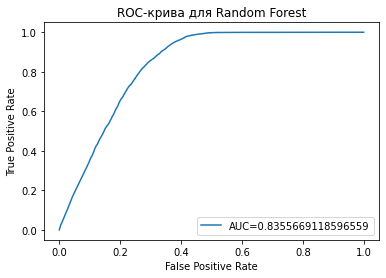

,Predicted Negative,Predicted Positive
Actual Negative,53066,39223
Actual Positive,215,9126


In [ ]:
random_forest_clf_pred = random_forest_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  random_forest_clf_pred)
auc = metrics.roc_auc_score(Y_test, random_forest_clf_pred)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.title("ROC-крива для Random Forest")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

display(pd.DataFrame(
    confusion_matrix(Y_test, pred_y), 
    columns=["Predicted Negative", "Predicted Positive"],
    index=["Actual Negative", "Actual Positive"]))

# Neural Network

In [ ]:
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
y_nn_train = to_categorical(Y_train)

In [ ]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(9),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(200, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(
        loss=tf.keras.losses.binary_crossentropy, 
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        metrics=['accuracy']
    )
    return model

In [ ]:
y_nn_train = to_categorical(Y_train)

In [ ]:
model = create_model()
model.fit(X_train, y_nn_train, validation_split=0.2, epochs=35, batch_size=256, verbose=2, class_weight=weights)

Epoch 1/35
1271/1271 - 23s - loss: 0.5712 - accuracy: 0.6073 - val_loss: 0.5957 - val_accuracy: 0.6087 - 23s/epoch - 18ms/step
Epoch 2/35
1271/1271 - 5s - loss: 0.4999 - accuracy: 0.6462 - val_loss: 0.5466 - val_accuracy: 0.6287 - 5s/epoch - 4ms/step
Epoch 3/35
1271/1271 - 6s - loss: 0.4817 - accuracy: 0.6545 - val_loss: 0.5234 - val_accuracy: 0.6307 - 6s/epoch - 4ms/step
Epoch 4/35
1271/1271 - 5s - loss: 0.4717 - accuracy: 0.6554 - val_loss: 0.5138 - val_accuracy: 0.6418 - 5s/epoch - 4ms/step
Epoch 5/35
1271/1271 - 6s - loss: 0.4654 - accuracy: 0.6568 - val_loss: 0.5113 - val_accuracy: 0.6496 - 6s/epoch - 5ms/step
Epoch 6/35
1271/1271 - 5s - loss: 0.4612 - accuracy: 0.6568 - val_loss: 0.5019 - val_accuracy: 0.6516 - 5s/epoch - 4ms/step
Epoch 7/35
1271/1271 - 6s - loss: 0.4578 - accuracy: 0.6573 - val_loss: 0.5090 - val_accuracy: 0.6489 - 6s/epoch - 5ms/step
Epoch 8/35
1271/1271 - 5s - loss: 0.4555 - accuracy: 0.6583 - val_loss: 0.5096 - val_accuracy: 0.6510 - 5s/epoch - 4ms/step
Epoch

In [ ]:
test_y_predictions = model.predict(X_test)
test_y_predictions_bin = np.argmax(test_y_predictions, axis = 1)
test_y_true = Y_test.to_numpy()
confusion_matrix(test_y_true, test_y_predictions_bin)
print(classification_report(test_y_true, test_y_predictions_bin))

3176/3176 [==============================] - 7s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.64      0.78     92289
           1       0.21      0.93      0.34      9341

    accuracy                           0.67    101630
   macro avg       0.60      0.79      0.56    101630
weighted avg       0.92      0.67      0.74    101630



3176/3176 [==============================] - 9s 3ms/step


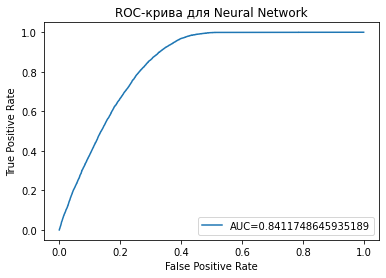

,Predicted Negative,Predicted Positive
Actual Negative,53071,39218
Actual Positive,215,9126


In [ ]:
nn_pred = model.predict(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  nn_pred)
auc = metrics.roc_auc_score(Y_test, nn_pred)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.title("ROC-крива для Neural Network")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

display(pd.DataFrame(
    confusion_matrix(Y_test, pred_y), 
    columns=["Predicted Negative", "Predicted Positive"],
    index=["Actual Negative", "Actual Positive"]))